# COVID PREDICTION USING ML

**Machine Learning**: Machine learning is the science of making computer learn and act like humans by feeding data and information without being explicitly programmed

**Types of Machine Learning**: 
1. Supervised - Situations based on labeled data fed to the machine
2. Unsupervised - Hidden pattern in an unlabeled data

**Algorithms**:
The method used to train the dataset and test it on testing dataset. eg. Linear regression, Random forest, Support vector machine(SVM) etc.

In this project we aim to predict the spread of COVID-19 in India vs Asia using Linear regression, SVM and Artificial neural networks and compare the algorithms.

## Code: 

***Importing important libraries***

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np

***Reading dataset***

In [2]:
covid=pd.read_csv('2021.csv')

***Extracting India's dataset for COVID19***

In [3]:
india_case=covid[covid["Country"]=="India"].copy()
index=np.arange(len(india_case))
india_case=india_case.set_index(index)
india_case.head()

,Country,date,total_cases,Recovered,Cumulative_deaths,Active Cases,Death Rate(%),Increase,FirstDays,day_xth,Population_1k,TenCase,Cases/1000s
0,India,01-01-2021,10286709,9883461,148994,254254,1.448413,20035,30-01-2020,337,1380004,04-03-2020,7.454115
1,India,02-01-2021,10323965,9927310,149435,247220,1.447457,37256,30-01-2020,338,1380004,04-03-2020,7.481112
2,India,03-01-2021,10340469,9946867,149649,243953,1.447217,16504,30-01-2020,339,1380004,04-03-2020,7.493072
3,India,04-01-2021,10356844,9975958,149850,231036,1.446869,16375,30-01-2020,340,1380004,04-03-2020,7.504938
4,India,05-01-2021,10374932,9997272,150114,227546,1.446891,18088,30-01-2020,341,1380004,04-03-2020,7.518045


***Defining a function to plot learning curves***

In [4]:
from sklearn.metrics import mean_squared_error
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), color="#175F90", linewidth=1.8, label="train")
    plt.plot(np.sqrt(val_errors), "#5FBA83",linewidth=1.8, label="val")
    plt.legend(loc="upper right", fontsize=12)   
    plt.xlabel("Training set size", fontsize=12) 
    plt.ylabel("RMSE", fontsize=12)

***Defining a funtion to calculate Mean absolute percentage error***

In [5]:
def MAPE(y,y_pred):
    MAPE = np.mean(np.abs(np.array(y) -\
                      np.array(y_pred))/np.array(y))
    return MAPE

## India COVID Prediction

Using seaborn and matplot library for data visualisation

In [6]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

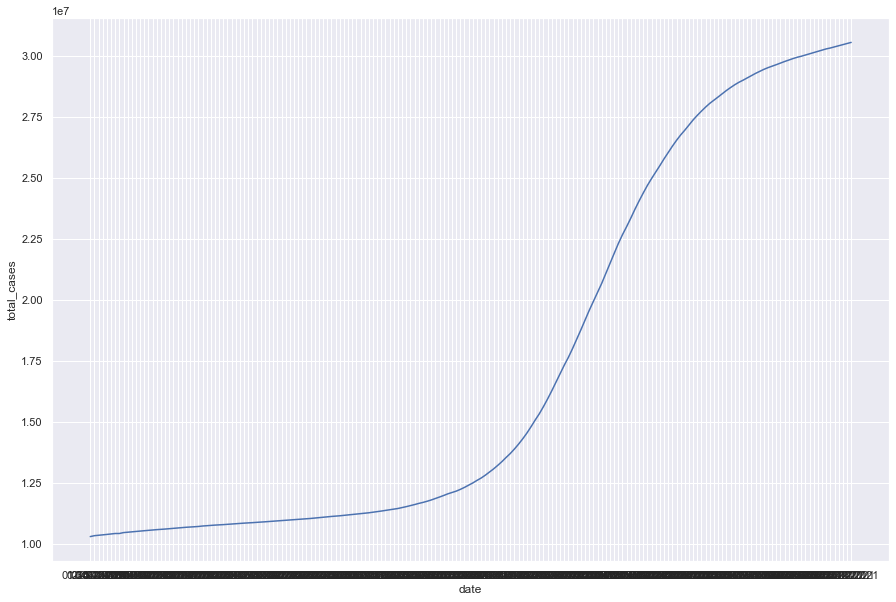

In [7]:
#Plotting confirmed cases per day vs date
sns.set(rc={'figure.figsize':(15,10)})
sns.set(style="darkgrid")
sns.lineplot(x="date",y="total_cases",data=india_case)
plt.show()

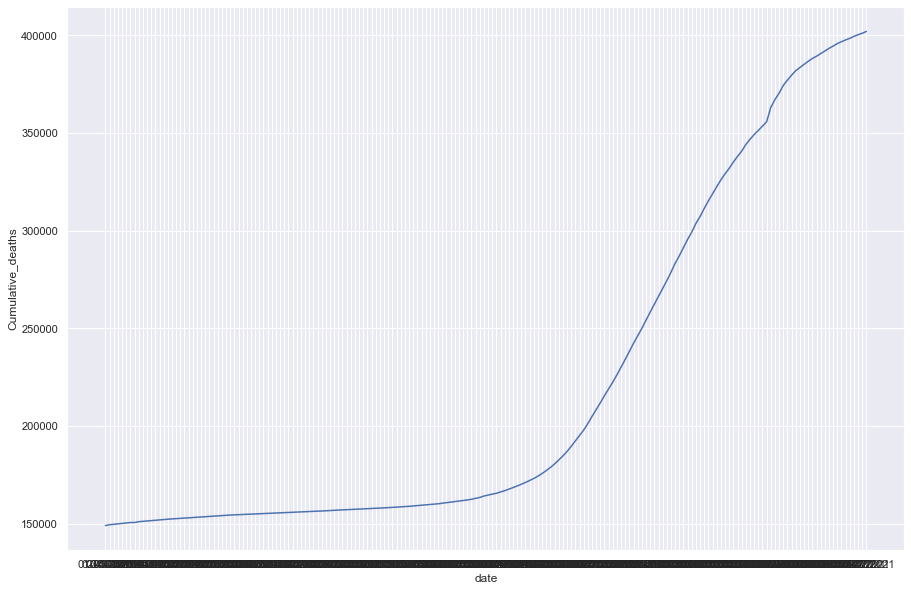

In [8]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="Cumulative_deaths",data=india_case)
plt.show()

We need the time where COVID was at its peak so refining data to get the desired months where COVID was at peak

In [9]:
india_case2=india_case[(india_case["date"]>="01-05-2020") & (india_case["date"]<"30-09-2020")]
india_case2.head()

,Country,date,total_cases,Recovered,Cumulative_deaths,Active Cases,Death Rate(%),Increase,FirstDays,day_xth,Population_1k,TenCase,Cases/1000s
1,India,02-01-2021,10323965,9927310,149435,247220,1.447457,37256,30-01-2020,338,1380004,04-03-2020,7.481112
2,India,03-01-2021,10340469,9946867,149649,243953,1.447217,16504,30-01-2020,339,1380004,04-03-2020,7.493072
3,India,04-01-2021,10356844,9975958,149850,231036,1.446869,16375,30-01-2020,340,1380004,04-03-2020,7.504938
4,India,05-01-2021,10374932,9997272,150114,227546,1.446891,18088,30-01-2020,341,1380004,04-03-2020,7.518045
5,India,06-01-2021,10395278,10016859,150336,228083,1.446195,20346,30-01-2020,342,1380004,04-03-2020,7.532788


Using sklearn library for machine learning model. To build a model the date must be in **'date'** format and not in **'string'** format.

In [10]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import datetime as dt

To apply an algorithm a dataset must be divided into training and testing dataset. Using sklearn to split the data into 25% testing dataset and training dataset. 


### Linear regression Model

In [11]:
import warnings
import numpy as np
warnings.filterwarnings('ignore')
start=0
dateHI=[]
for i in range(0,len(india_case2.index)):
    dateHI.append(start+i)
india_case2['dates']=dateHI
india_x=np.array(dateHI)
india_y=india_case2['total_cases']
india_z=india_case2['Cumulative_deaths']

***Splitting data***

In [12]:
india_x_train,india_x_test,india_y_train,india_y_test=train_test_split(india_x,india_y,test_size=0.25)
india_x_train2,india_x_test2,india_z_train,india_z_test=train_test_split(india_x,india_z,test_size=0.25)

***Training and predicting***

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
import numpy as np
lr.fit(np.array(india_x_train).reshape(-1,1),np.array(india_y_train).reshape(-1,1))
lr_india_y_pred=lr.predict(np.array(india_x_test).reshape(-1,1))
lr.fit(np.array(india_x_train2).reshape(-1,1),np.array(india_z_train).reshape(-1,1))
lr_india_z_pred=lr.predict(np.array(india_x_test2).reshape(-1,1))

***Plot***

<AxesSubplot:title={'center':'Cumulative deaths per day'}, ylabel='Cumulative_deaths'>

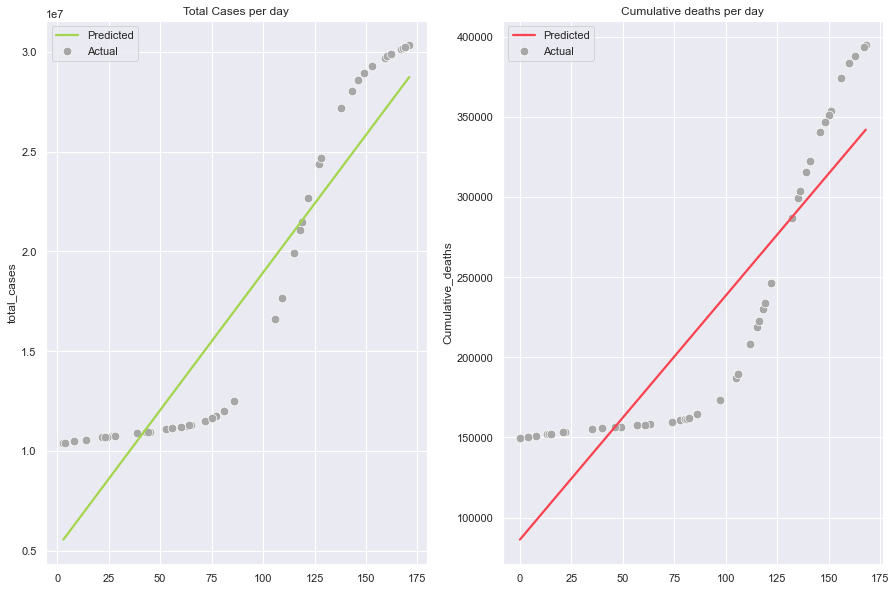

In [14]:
f, axes = plt.subplots(1, 2)
lr_india_y_pred=np.array(lr_india_y_pred).reshape(-1)
lr_india_z_pred=np.array(lr_india_z_pred).reshape(-1)
sns.scatterplot(india_x_test,india_y_test,color='#A7A7A7',s=75,legend="brief",label="Actual",ax=axes[0]).set_title('Total Cases per day')
sns.lineplot(india_x_test,lr_india_y_pred,color="#A4D54E",linewidth=2.25,label="Predicted",ax=axes[0])
sns.scatterplot(india_x_test2,india_z_test,color='#A7A7A7',s=75,legend="brief",label="Actual",ax=axes[1]).set_title('Cumulative deaths per day')
sns.lineplot(india_x_test2,lr_india_z_pred,color="#F94350",linewidth=2.25,label="Predicted",ax=axes[1])

***Mean absolute Percentage Error***

In [15]:
print("MAPE of confirmed casses is ",MAPE(india_y_test,lr_india_y_pred)*100, " %")
print("Accuracy for confirmed cases is: ",(1-MAPE(india_y_test,lr_india_y_pred))*100,"\n")
print("MAPE of deaths is ",MAPE(india_z_test,lr_india_z_pred)*100, " %")
print("Accuracy for deaths is: ",(1-MAPE(india_z_test,lr_india_z_pred))*100)

MAPE of confirmed casses is  16.596464968100555  %
Accuracy for confirmed cases is:  83.40353503189945 

MAPE of deaths is  18.187850268286432  %
Accuracy for deaths is:  81.81214973171357


***R square***

It can be seen that model is not good as the actual data seems to be an exponential and the fitting model is linear. Calculating R square tells how accurate a machine learning algorithm is.

In [16]:
from sklearn.metrics import r2_score
score_lr_india1=r2_score(india_y_test, lr_india_y_pred)*100
score_lr_india2=r2_score(india_z_test, lr_india_z_pred)*100
print('R square score for total cases=',score_lr_india1)
print('R square score for cumulative deaths=',score_lr_india2)

R square score for total cases= 88.83903945432782
R square score for cumulative deaths= 78.21679864629209


***Cross validation***

In [17]:
from sklearn.model_selection import cross_val_score
lr_scores_india1 = cross_val_score(lr, np.array(india_x_train).reshape(-1,1), np.array(india_y_train).reshape(-1,1), scoring='r2', cv=5)
print("Cross Validation scores for total cases :",lr_scores_india1)
print("Mean of cross validation scores for total cases= ",np.mean(lr_scores_india1),'\n')
lr_scores_india2 = cross_val_score(lr, np.array(india_x_train2).reshape(-1,1), np.array(india_z_train).reshape(-1,1), scoring='r2', cv=5)
print("Cross Validation scores for cumulative deaths :",lr_scores_india2)
print("Mean of cross validation scores for cumulative deaths= ",np.mean(lr_scores_india2))

Cross Validation scores for total cases : [0.86059386 0.81697175 0.80631699 0.76864441 0.8860573 ]
Mean of cross validation scores for total cases=  0.8277168608337213 

Cross Validation scores for cumulative deaths : [0.82038749 0.75821333 0.6316625  0.81392067 0.77433997]
Mean of cross validation scores for cumulative deaths=  0.7597047903740305


***Learning Curve***

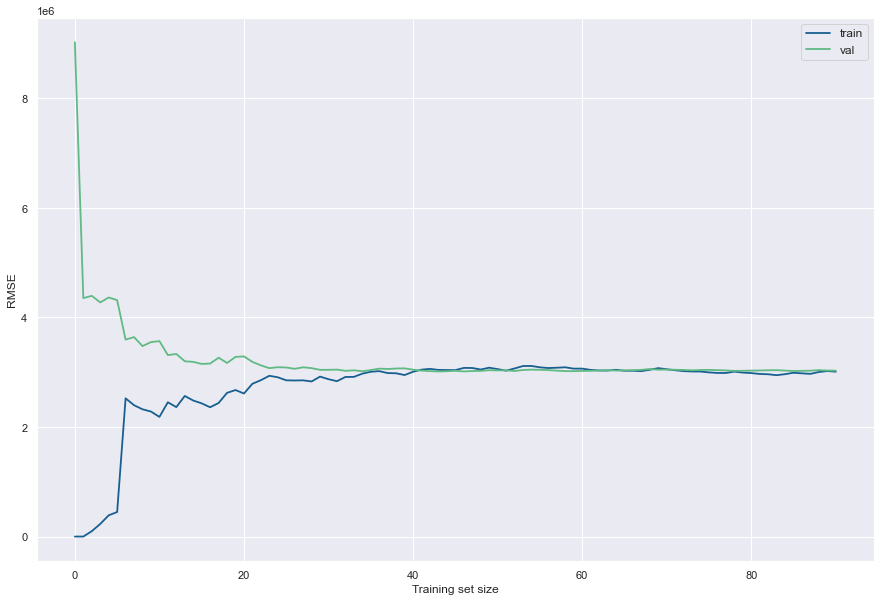

In [18]:
plot_learning_curves(lr,np.array(india_x_train).reshape(-1,1),np.array(india_y_train).reshape(-1,1))

### Polynomial Regression

***Adding polynomial feature***

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
pr_x=poly.fit_transform(np.array(india_x_train).reshape(-1,1))
pr_x2=poly.fit_transform(np.array(india_x_train2).reshape(-1,1))

***Training the model and predicting***

In [20]:
Pr=LinearRegression()
Pr.fit(pr_x,np.array(india_y_train).reshape(-1,1))
pr_india1=Pr.predict(poly.fit_transform(np.array(india_x_test).reshape(-1,1)))
pr_pred1=np.array(pr_india1).reshape(-1)

In [21]:
Pr.fit(pr_x2,np.array(india_z_train).reshape(-1,1))
pr_india2=Pr.predict(poly.fit_transform(np.array(india_x_test2).reshape(-1,1)))
pr_pred2=np.array(pr_india2).reshape(-1)

***Plot***

<AxesSubplot:title={'center':'Cumulative deaths per day'}, ylabel='Cumulative_deaths'>

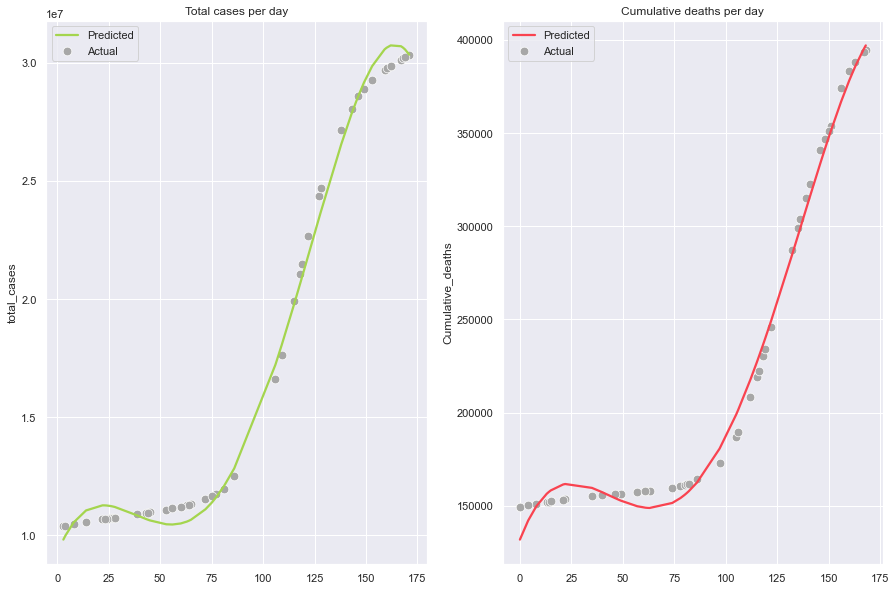

In [22]:
f, axes = plt.subplots(1, 2)
sns.scatterplot(india_x_test,india_y_test,color='#A7A7A7',s=75,legend="brief",label="Actual",ax=axes[0]).set_title('Total cases per day')
sns.lineplot(india_x_test,y=pr_pred1,color="#A4D54E",linewidth=2.25,label="Predicted",ax=axes[0])
sns.scatterplot(india_x_test2,india_z_test,color='#A7A7A7',s=75,legend="brief",label="Actual",ax=axes[1]).set_title('Cumulative deaths per day')
sns.lineplot(india_x_test2,y=pr_pred2,color="#F94350",linewidth=2.25,label="Predicted")

***Mean absolute percentage error***

In [23]:
print("MAPE of confirmed casses is ",MAPE(india_y_test,pr_pred1)*100, " %")
print("Accuracy for confirmed cases is: ",(1-MAPE(india_y_test,pr_pred1))*100,"\n")
print("MAPE of deaths is ",MAPE(india_z_test,pr_pred2)*100, " %")
print("Accuracy for deaths is: ",(1-MAPE(india_z_test,pr_pred2))*100)

MAPE of confirmed casses is  3.161781970735432  %
Accuracy for confirmed cases is:  96.83821802926457 

MAPE of deaths is  3.130373459209594  %
Accuracy for deaths is:  96.8696265407904


***R square***

In [24]:
score_pr_india1=r2_score(india_y_test, pr_pred1)*100
score_pr_india2=r2_score(india_z_test, pr_pred2)*100
print('R square score for total cases=',score_pr_india1)
print('R square score for cumulative deaths=',score_pr_india2)

R square score for total cases= 99.54348921960899
R square score for cumulative deaths= 99.3836422344371


***Cross Validation***

In [25]:
pr_scores_india1 = cross_val_score(Pr, pr_x, np.array(india_y_train).reshape(-1,1), scoring='r2', cv=5)
print("Cross Validation scores for total cases :",pr_scores_india1)
print("Mean of cross validation scores for total cases= ",np.mean(pr_scores_india1),'\n')
pr_scores_india2 = cross_val_score(Pr,pr_x2, np.array(india_z_train).reshape(-1,1), scoring='r2', cv=5)
print("Cross Validation scores for cumulative deaths :",pr_scores_india2)
print("Mean of cross validation scores for cumulative deaths= ",np.mean(pr_scores_india2))

Cross Validation scores for total cases : [0.99338943 0.99303993 0.99299648 0.99211297 0.9944429 ]
Mean of cross validation scores for total cases=  0.9931963423550784 

Cross Validation scores for cumulative deaths : [0.99371369 0.99096899 0.99125029 0.99497148 0.99482406]
Mean of cross validation scores for cumulative deaths=  0.9931457028918397


***Learning curve***

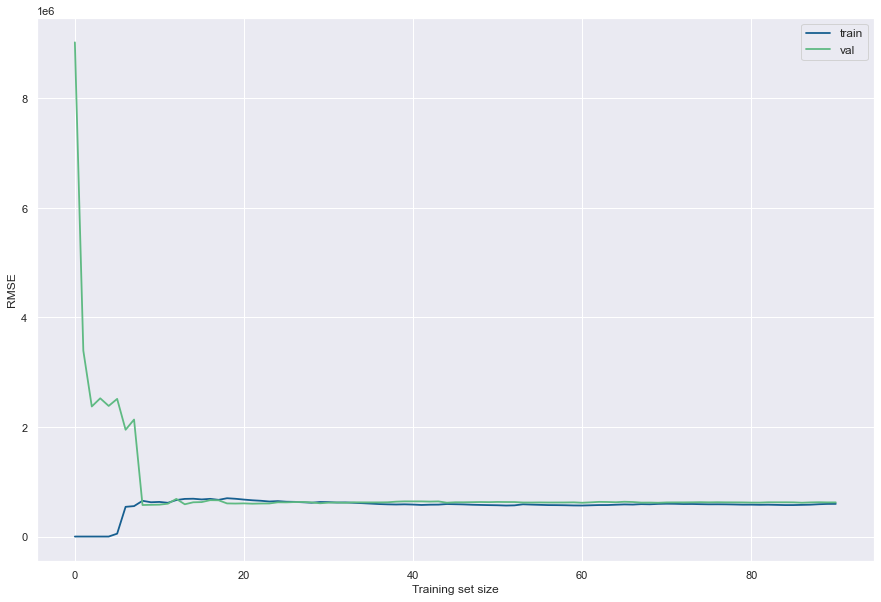

In [26]:
plot_learning_curves(Pr,pr_x,np.array(india_y_train).reshape(-1,1))

</br>

### ARIMA Model

***Performing Augmented Dickey Fuller Test***

In [27]:
#Performing ADF test
from statsmodels.tsa.stattools import adfuller
from numpy import log
adf_data=india_case2['total_cases']
result = adfuller(adf_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.114626
p-value: 0.967046


From above results 'p' value is less than significance level(0.05) in order to reject null hypothesis

***To find 'd' value, plotting auto-correlation***

If more than 10 values are positive then it requires more differencing and it is non-stationary

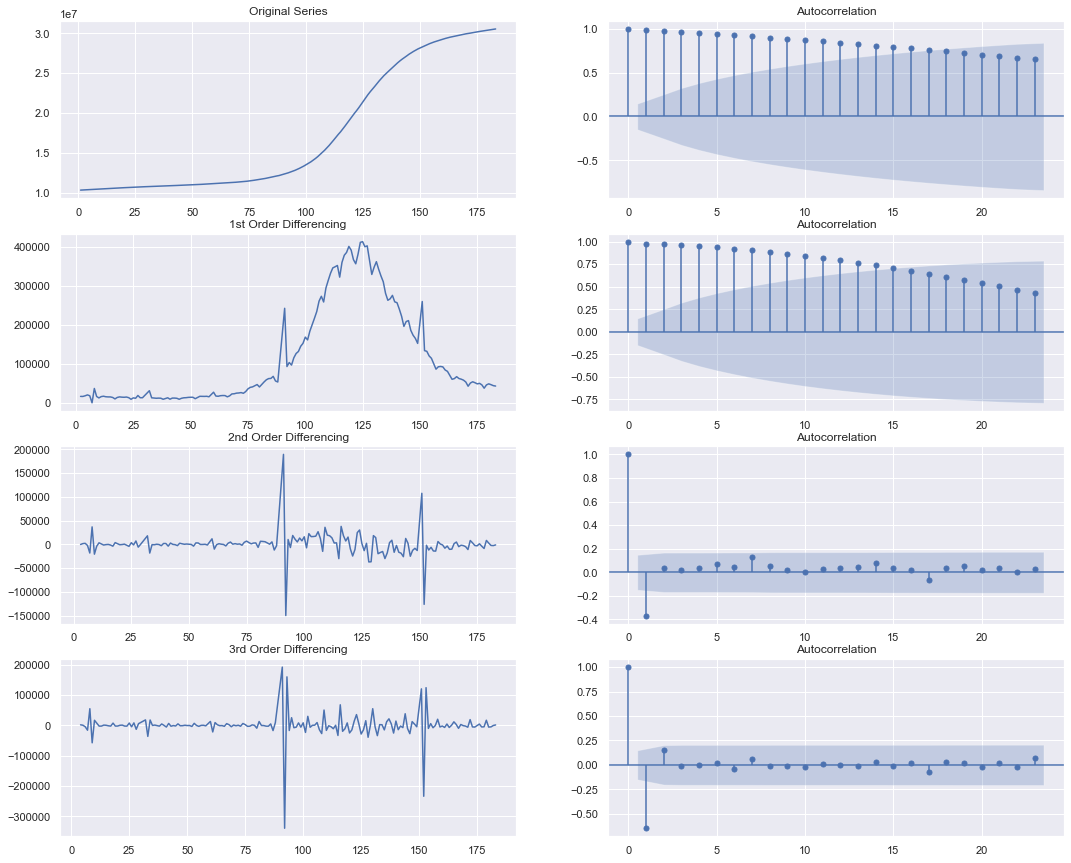

In [28]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(18,15)})
# Original Series
fig, axes = plt.subplots(4, 2)
axes[0, 0].plot(adf_data); axes[0, 0].set_title('Original Series')
plot_acf(adf_data, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(adf_data.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(adf_data.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(adf_data.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(adf_data.diff().diff().dropna(), ax=axes[2, 1])

#3rd Differencing
axes[3, 0].plot(adf_data.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(adf_data.diff().diff().diff().dropna(), ax=axes[3, 1])

plt.show()

From above results, it can be observed that for order 1 differencing has more than 10 positive autocorrelation samples therefore it needs more differencing. Therefore d=2

***To find 'p' value, plotting Partial auto correlation plot***

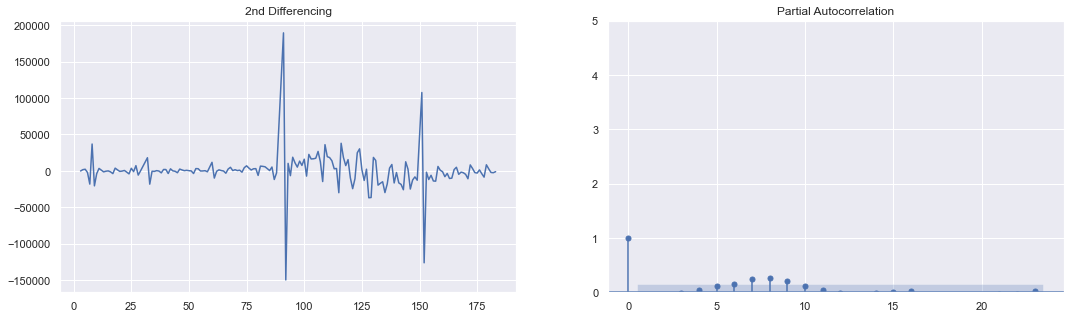

In [29]:
# PACF plot of 1st differenced series
sns.set(rc={'figure.figsize':(18,5)})

fig, axes = plt.subplots(1, 2)
axes[0].plot(adf_data.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(adf_data.diff().diff().dropna(), ax=axes[1])

plt.show()

One sample is well above significance level therefore p=1.

***To find 'q' value, plotting autocorrelation plot for order 2 differencing***

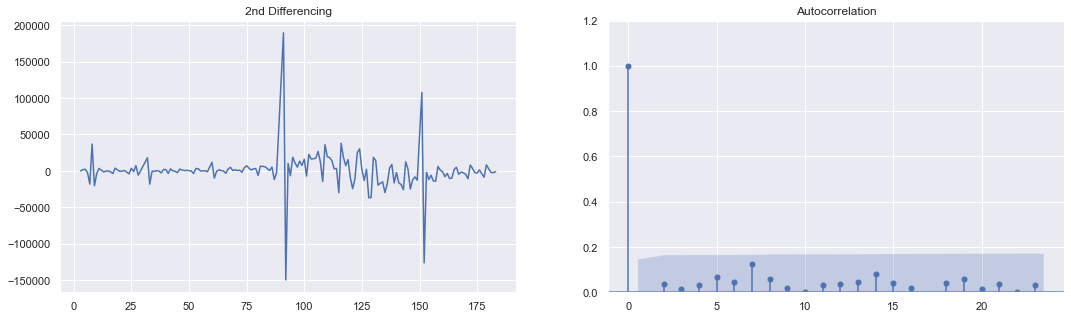

In [30]:
sns.set(rc={'figure.figsize':(18,5)})
fig, axes = plt.subplots(1, 2)
axes[0].plot(adf_data.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(adf_data.diff().diff().dropna(), ax=axes[1])

plt.show()

***Training and forecasting using ARIMA***

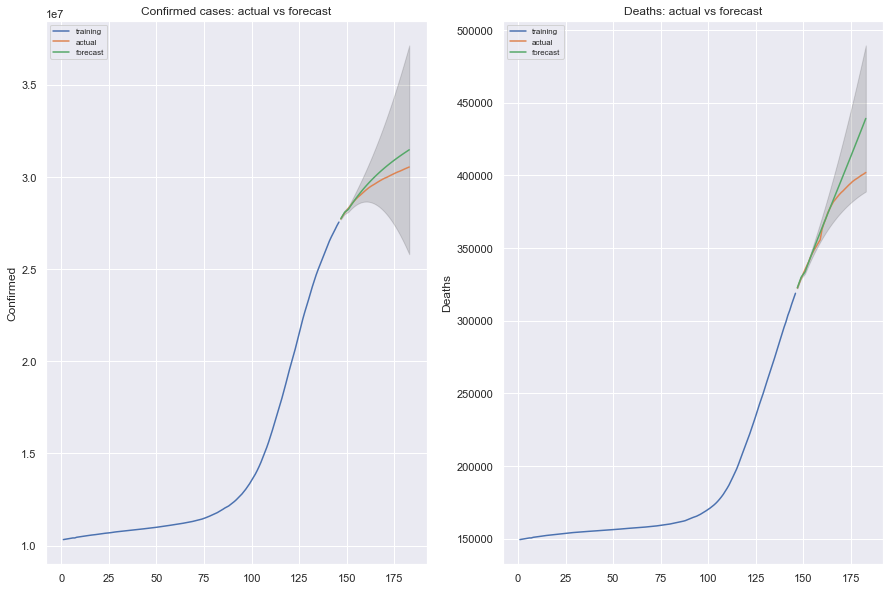

In [31]:
from statsmodels.tsa.arima_model import ARIMA
sns.set(rc={'figure.figsize':(15,10)})

warnings.filterwarnings('ignore')
#Splitting dataset
split=int(len(india_case2)*0.8)
arima_train=india_case2[:split]['total_cases']
arima_test=india_case2[split:]['total_cases']
arima_death_train=india_case2[:split]['Cumulative_deaths']
arima_death_test=india_case2[split:]['Cumulative_deaths']

# 1,2,2 ARIMA Model for confirmed cases
model = ARIMA(arima_train, order=(1,2,2))
confirmed = model.fit(disp=-1)
# Forecast
conf_fc, se, conf_ci = confirmed.forecast(len(india_case2)-split,alpha=0.05)  # 95% conf

# Make as pandas series
conf_fc = pd.Series(conf_fc, index=arima_test.index)
conf_low = pd.Series(conf_ci[:, 0], index=arima_test.index)
conf_high = pd.Series(conf_ci[:, 1], index=arima_test.index)

# 1,2,2 ARIMA Model for deaths cases
model = ARIMA(arima_death_train, order=(1,2,2))
deaths = model.fit(disp=-1)
# Forecast
death_fc, se, death_ci = deaths.forecast(len(india_case2)-split,alpha=0.05)  # 95% conf

# Make as pandas series
death_fc = pd.Series(death_fc, index=arima_death_test.index)
death_low = pd.Series(death_ci[:, 0], index=arima_death_test.index)
death_high = pd.Series(death_ci[:, 1], index=arima_death_test.index)


# Plot
f, axes = plt.subplots(1, 2)
axes[0].plot(arima_train, label='training')
axes[0].plot(arima_test, label='actual')
axes[0].plot(conf_fc, label='forecast')
axes[0].fill_between(conf_low.index, conf_low, conf_high, 
                 color='k', alpha=.15)
axes[0].set_title('Confirmed cases: actual vs forecast')
axes[0].set_ylabel('Confirmed')
axes[0].legend(loc='upper left', fontsize=8)
axes[1].plot(arima_death_train, label='training')
axes[1].plot(arima_death_test, label='actual')
axes[1].plot(death_fc, label='forecast')
axes[1].fill_between(death_low.index, death_low, death_high, 
                 color='k', alpha=.15)
axes[1].set_ylabel('Deaths')
axes[1].set_title('Deaths: actual vs forecast')
axes[1].legend(loc='upper left', fontsize=8)
plt.show()

***Mean absolute percentage error***

In [32]:
print("MAPE of confirmed casses is ",MAPE(arima_test,conf_fc)*100, " %")
print("Accuracy for confirmed cases is: ",(1-MAPE(arima_test,conf_fc))*100,"\n")
print("MAPE of deaths is ",MAPE(arima_death_test,death_fc)*100, " %")
print("Accuracy for deaths is: ",(1-MAPE(arima_death_test,death_fc))*100)

MAPE of confirmed casses is  1.3983332514738913  %
Accuracy for confirmed cases is:  98.6016667485261 

MAPE of deaths is  2.4298031035182377  %
Accuracy for deaths is:  97.57019689648176


</br>

### Multilayer Perceptron using keras

***Scaling data and splitting into training and testing***

In [33]:
## For confirmed cases

from sklearn.preprocessing import MinMaxScaler
#Take 10 steps to predict the 11th data point
n_steps = 10
n_features = 1 
#Splitting training and testing data
size_x_Train=len(india_x)-n_steps
mlp_india_y=np.array(india_y).reshape(-1,1)
mlp_train=mlp_india_y[:size_x_Train]
mlp_test=mlp_india_y[size_x_Train:]
#Scaling data
mlp_scaler=MinMaxScaler()
mlp_scaler=mlp_scaler.fit(mlp_train)
mlp_train=mlp_scaler.transform(mlp_train)
mlp_test=mlp_scaler.transform(mlp_test)

***Using TimeseriesGenerator***

In [34]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input=n_steps
generator = TimeseriesGenerator(mlp_train,mlp_train,length = n_input,batch_size=1)
print(len(generator))
for i in range(len(generator)-2,len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

157
[[[0.96746824]
  [0.97103227]
  [0.97409273]
  [0.9772419 ]
  [0.98064332]
  [0.98380545]
  [0.98688018]
  [0.98982702]
  [0.99253209]
  [0.99469012]]] => [[0.99726355]]
[[[0.97103227]
  [0.97409273]
  [0.9772419 ]
  [0.98064332]
  [0.98380545]
  [0.98688018]
  [0.98982702]
  [0.99253209]
  [0.99469012]
  [0.99726355]]] => [[1.]]


***Defining neural network***

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten

model = Sequential()
model.add(Dense(192, activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10, 192)           384       
_________________________________________________________________
dense_1 (Dense)              (None, 10, 64)            12352     
_________________________________________________________________
dense_2 (Dense)              (None, 10, 64)            4160      
_________________________________________________________________
flatten (Flatten)            (None, 640)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 641       
Total params: 17,537
Trainable params: 17,537
Non-trainable params: 0
_________________________________________________________________


***Preparing a validation set***

In [37]:
val_set = np.append(mlp_train[-1],mlp_test)
val_set=val_set.reshape(n_steps+1,1)
val_set

array([[1.        ],
       [1.00261488],
       [1.00507951],
       [1.00761205],
       [1.00994761],
       [1.01184884],
       [1.01417443],
       [1.01664351],
       [1.01900281],
       [1.02123528],
       [1.02341512]])

In [38]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(val_set,val_set,length = n_input,batch_size=1)

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=25,restore_best_weights=True)

# fit the model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)

Epoch 1/200
10/10 [==============================] - 18s 75ms/step - loss: 0.0668 - val_loss: 0.4852
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1275 - val_loss: 0.0329
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0188 - val_loss: 0.0030
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0158 - val_loss: 0.0126
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0072 - val_loss: 4.4100e-05
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0029
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0038
Epoch 8/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 9/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 10/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0011
Epo

<AxesSubplot:title={'center':'Loss vs epochs curve'}>

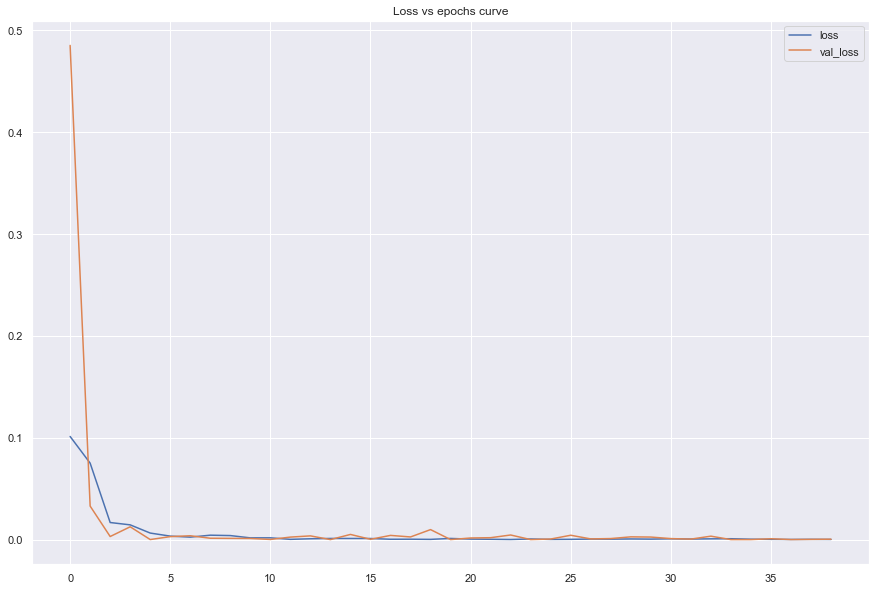

In [40]:
pd.DataFrame(model.history.history).plot(title="Loss vs epochs curve")

***Taking test batch as last 10 data points***

In [41]:
# list of predictions
mlp_pred = []

# last `n_input` points from training set
test_batch = mlp_train[-n_input:].reshape(1,n_input,n_features)

test_batch.shape

(1, 10, 1)

***Forecasting for 50 unseen observations***

In [42]:

# forecast the number of confirmed cases in India for the validation set and the next 50 days

for i in range(n_steps+50):
    batch_pred = model.predict(test_batch)[0]
    mlp_pred.append(batch_pred)
    test_batch = np.append(test_batch[:,1:,:],[[batch_pred]],axis=1)

mlp_pred

[array([1.0002184], dtype=float32),
 array([1.0027574], dtype=float32),
 array([1.0050597], dtype=float32),
 array([1.007457], dtype=float32),
 array([1.0096362], dtype=float32),
 array([1.0119289], dtype=float32),
 array([1.0139958], dtype=float32),
 array([1.0159647], dtype=float32),
 array([1.0181115], dtype=float32),
 array([1.0201218], dtype=float32),
 array([1.021985], dtype=float32),
 array([1.024059], dtype=float32),
 array([1.0260886], dtype=float32),
 array([1.0280931], dtype=float32),
 array([1.0300581], dtype=float32),
 array([1.0320276], dtype=float32),
 array([1.0339348], dtype=float32),
 array([1.035833], dtype=float32),
 array([1.0377401], dtype=float32),
 array([1.0396119], dtype=float32),
 array([1.0414652], dtype=float32),
 array([1.0433236], dtype=float32),
 array([1.0451627], dtype=float32),
 array([1.046981], dtype=float32),
 array([1.0487844], dtype=float32),
 array([1.0505736], dtype=float32),
 array([1.0523412], dtype=float32),
 array([1.0540969], dtype=float32

In [43]:
# apply inverse transformations on scaled data
mlp_pred = mlp_scaler.inverse_transform(mlp_pred)
mlp_pred[:,0]

array([30087093.1551981 , 30137261.5452441 , 30182752.04324675,
       30230119.82219529, 30273177.15681386, 30318479.2200917 ,
       30359317.73582566, 30398222.44019628, 30440639.0967505 ,
       30480361.13673997, 30517176.57109928, 30558156.41287684,
       30598257.67774999, 30637864.30147052, 30676691.27651715,
       30715605.40262401, 30753289.9921515 , 30790795.56869042,
       30828477.80278385, 30865462.82839549, 30902080.40629375,
       30938801.62329066, 30975138.90453577, 31011066.34025443,
       31046699.34671557, 31082052.05652356, 31116978.43276668,
       31151669.26560378, 31186133.97677112, 31220243.01739538,
       31254081.18310273, 31287667.31736565, 31320959.02237105,
       31353951.58725083, 31386666.21091151, 31419112.31508934,
       31451266.34544373, 31483154.21174932, 31514787.69117641,
       31546129.09678006, 31577232.60354364, 31608062.87995625,
       31638629.34775412, 31668939.07323945, 31698987.3455441 ,
       31728790.6527065 , 31758344.28385

In [44]:
last_day=size_x_Train
future=india_x[last_day:]
for i in range(len(india_x),len(india_x)+50):
    future=np.append(future,i)
print(future)

[167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226]


In [45]:
from itertools import repeat
mlp_conf_df = pd.DataFrame(columns=["Confirmed","Confirmed_predicted"],index=future)
mlp_conf_df.loc[:,"Confirmed_predicted"] = mlp_pred[:,0]
test_set=india_case2.iloc[size_x_Train:]['total_cases'].values.tolist()
nan_list=[]
nan_list=nan_list.extend(repeat(None,50))
mlp_conf_df.loc[:,"Confirmed"] =india_case2.iloc[size_x_Train:]['total_cases'].values.tolist()+[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]

***For Death cases, Similarly...***

In [46]:
## For death cases

mlp_deaths_india=np.array(india_z).reshape(-1,1)
mlp_deaths_train=mlp_deaths_india[:size_x_Train]
mlp_deaths_test=mlp_deaths_india[size_x_Train:]
#Scaling data
mlp_scaler2=MinMaxScaler()
mlp_scaler2=mlp_scaler2.fit(mlp_deaths_train)
mlp_deaths_train=mlp_scaler2.transform(mlp_deaths_train)
mlp_deaths_test=mlp_scaler2.transform(mlp_deaths_test)

In [47]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input=n_steps
generator = TimeseriesGenerator(mlp_deaths_train,mlp_deaths_train,length = n_input,batch_size=1)
for i in range(len(generator)-2,len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

[[[0.9109571 ]
  [0.9271231 ]
  [0.93836221]
  [0.94884269]
  [0.95844912]
  [0.96499221]
  [0.97178267]
  [0.97825979]
  [0.98414321]
  [0.98895467]]] => [[0.99455361]]
[[[0.9271231 ]
  [0.93836221]
  [0.94884269]
  [0.95844912]
  [0.96499221]
  [0.97178267]
  [0.97825979]
  [0.98414321]
  [0.98895467]
  [0.99455361]]] => [[1.]]


In [48]:
val_set = np.append(mlp_deaths_train[-1],mlp_deaths_test)
val_set=val_set.reshape(n_steps+1,1)

In [49]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(val_set,val_set,length = n_input,batch_size=1)

In [50]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=25,restore_best_weights=True)

# fit the model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)

Epoch 1/200
10/10 [==============================] - 0s 8ms/step - loss: 4.1203e-04 - val_loss: 0.0114
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 9.4931e-04
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 6.1363e-04 - val_loss: 0.0150
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 1.6775e-04 - val_loss: 0.0289
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 4.8535e-04 - val_loss: 3.2553e-06
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 7.4624e-04 - val_loss: 0.0100
Epoch 8/200
10/10 [==============================] - 0s 6ms/step - loss: 5.0590e-04 - val_loss: 8.3258e-04
Epoch 9/200
10/10 [==============================] - 0s 5ms/step - loss: 1.8854e-04 - val_loss: 0.0053
Epoch 10/200
10/10 [==============================] - 0s 5ms/step - l

In [51]:
# list of predictions
mlp_pred2 = []

# last `n_input` points from training set
test_batch = mlp_deaths_train[-n_input:].reshape(1,n_input,n_features)

test_batch.shape

(1, 10, 1)

In [52]:

# forecast the number of deaths in India for the validation set and the next 50 days

for i in range(n_steps+50):
    batch_pred = model.predict(test_batch)[0]
    mlp_pred2.append(batch_pred)
    test_batch = np.append(test_batch[:,1:,:],[[batch_pred]],axis=1)

In [53]:
# apply inverse transformations on scaled data
mlp_pred2 = mlp_scaler2.inverse_transform(mlp_pred2)
mlp_pred2[:,0]

array([390697.24456322, 392047.64616227, 393077.6112783 , 394203.62782645,
       395140.25940156, 396191.4761138 , 397029.94555402, 397802.37602043,
       398743.05551863, 399527.10930705, 400172.55064344, 401063.8743937 ,
       401909.05182076, 402740.72653294, 403542.93814778, 404356.31046486,
       405114.80451035, 405874.28162289, 406649.97934151, 407394.45022488,
       408129.32174778, 408880.09582567, 409618.26351452, 410344.08503795,
       411062.62029982, 411774.50540233, 412472.39625645, 413166.70180726,
       413855.94745421, 414535.30460334, 415208.15616179, 415876.41043615,
       416536.42429566, 417189.00732493, 417835.05584979, 418474.19399166,
       419105.95913076, 419732.02826381, 420351.64963365, 420964.24496555,
       421570.85515404, 422171.62476778, 422765.51291227, 423353.38699961,
       423935.27594352, 424510.94843411, 425080.25990272, 425643.81753778,
       426201.41894317, 426753.23760128, 427299.15785718, 427839.70015812,
       428374.28622937, 4

In [54]:
from itertools import repeat
mlp_deaths_df = pd.DataFrame(columns=["Deaths","Deaths_predicted"],index=future)
mlp_deaths_df.loc[:,"Deaths_predicted"] = mlp_pred2[:,0]
test_set=india_case2.iloc[size_x_Train:]['Cumulative_deaths'].values.tolist()
nan_list=[]
nan_list=nan_list.extend(repeat(None,50))
mlp_deaths_df.loc[:,"Deaths"] =india_case2.iloc[size_x_Train:]['Cumulative_deaths'].values.tolist()+[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]

<AxesSubplot:title={'center':'Death Predictions for next 50 days-MLP'}>

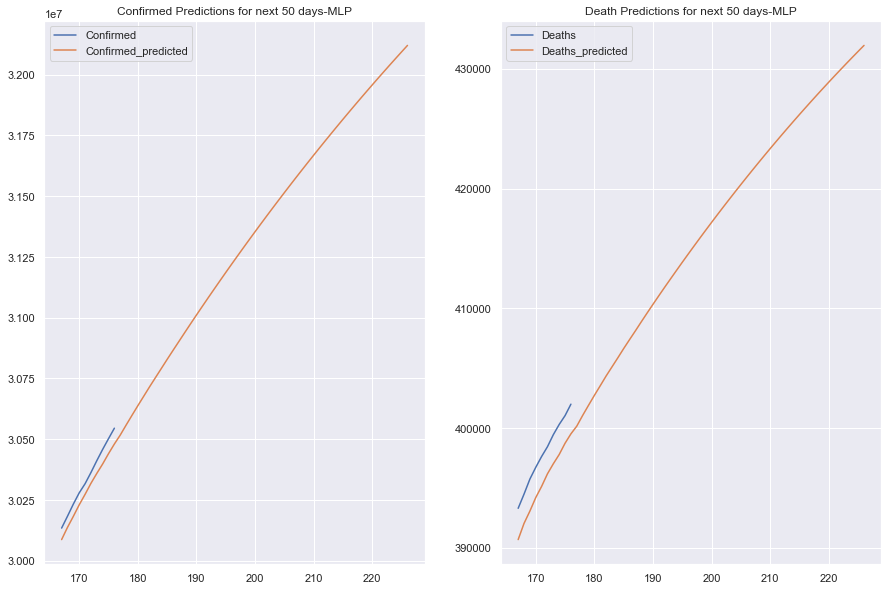

In [55]:
f, axes = plt.subplots(1, 2)
mlp_conf_df.plot(title="Confirmed Predictions for next 50 days-MLP",ax=axes[0])
mlp_deaths_df.plot(title="Death Predictions for next 50 days-MLP",ax=axes[1])

In [56]:
from itertools import repeat
present=future
present=np.append(np.arange(future[0]),future)
mlp = pd.DataFrame(columns=["Confirmed","Confirmed_predicted,Deaths,Deaths_predicted"],index=present)
mlp.loc[:future[0],"Confirmed"] = india_case2.iloc[:size_x_Train+1]['total_cases'].values.tolist()
mlp.loc[:future[0],"Deaths"] = india_case2.iloc[:size_x_Train+1]['Cumulative_deaths'].values.tolist()
nan_list=[]
nan_list.extend(repeat(None,167))
mlp.loc[:,"Confirmed_predicted"] =nan_list+ mlp_pred[:,0].tolist()
mlp.loc[:,"Deaths_predicted"] =nan_list+ mlp_pred2[:,0].tolist()
mlp

,Confirmed,"Confirmed_predicted,Deaths,Deaths_predicted",Deaths,Confirmed_predicted,Deaths_predicted
0,10323965,NaN,149435.0,NaN,NaN
1,10340469,NaN,149649.0,NaN,NaN
2,10356844,NaN,149850.0,NaN,NaN
3,10374932,NaN,150114.0,NaN,NaN
4,10395278,NaN,150336.0,NaN,NaN
...,...,...,...,...,...
222,NaN,NaN,NaN,3.201329e+07,429944.851474
223,NaN,NaN,NaN,3.204045e+07,430457.492019
224,NaN,NaN,NaN,3.206736e+07,430964.783523
225,NaN,NaN,NaN,3.209406e+07,431466.639245


<AxesSubplot:title={'center':'Time Forecasting'}>

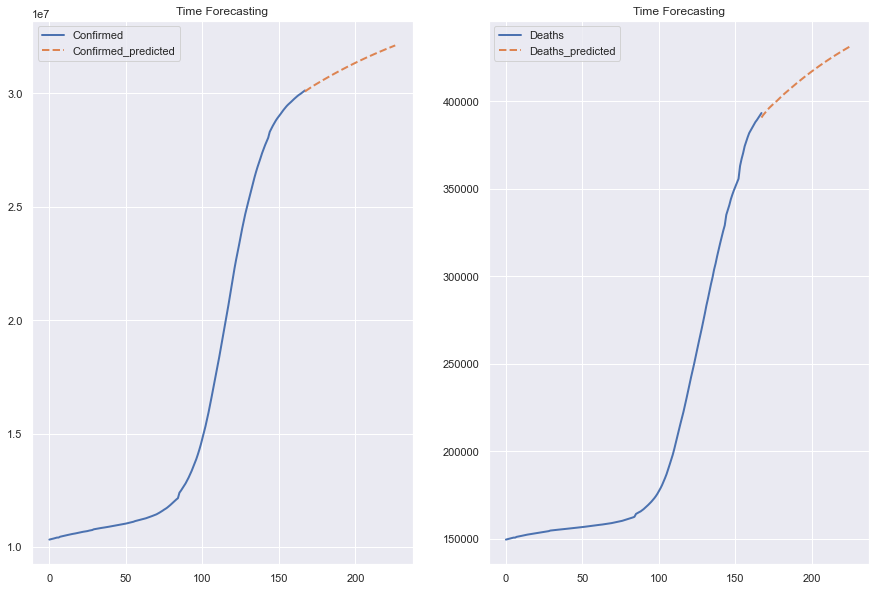

In [57]:
fig, axes = plt.subplots(1,2)
mlp.plot(y='Confirmed',ax=axes[0],linewidth=2).set_title('Time Forecasting')
mlp.plot(y='Confirmed_predicted',linestyle='dashed',ax=axes[0],linewidth=2)
mlp.plot(y='Deaths',ax=axes[1],linewidth=2).set_title('Time Forecasting')
mlp.plot(y='Deaths_predicted',linestyle='dashed',ax=axes[1],linewidth=2)

In [58]:
print("MAPE of confirmed casses is ",MAPE(mlp_conf_df["Confirmed"][:n_steps],mlp_conf_df["Confirmed_predicted"][:n_steps])*100," %")
print("Accuracy for confirmed cases is: ",(1-MAPE(mlp_conf_df["Confirmed"][:n_steps],mlp_conf_df["Confirmed_predicted"][:n_steps]))*100,"\n")
print("MAPE of deaths is ",MAPE(mlp_deaths_df["Deaths"][:n_steps],mlp_deaths_df["Deaths_predicted"][:n_steps]), " %")
print("Accuracy for deaths is: ",(1-MAPE(mlp_deaths_df["Deaths"][:n_steps],mlp_deaths_df["Deaths_predicted"][:n_steps]))*100)

MAPE of confirmed casses is  0.17133135234290933  %
Accuracy for confirmed cases is:  99.8286686476571 

MAPE of deaths is  0.006218825922017198  %
Accuracy for deaths is:  99.37811740779829


### Support Vector Machines 

***Importing the SVR model from sklearn SVM module and training the model***

In [59]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
scalerX1 = MinMaxScaler()
scalerY1 = MinMaxScaler()
scalerX2 = MinMaxScaler()
scalerY2 = MinMaxScaler()
svr_x_train1 = scalerX1.fit_transform(np.array(india_x_train).reshape(-1,1))
svr_y_train1 = scalerY1.fit_transform(np.array(india_y_train).reshape(-1,1))
svr_x_test1 = scalerX1.transform(np.array(india_x_test).reshape(-1,1))
svr_y_test1 = scalerY1.transform(np.array(india_y_test).reshape(-1,1))
svr_x_train2 = scalerX2.fit_transform(np.array(india_x_train2).reshape(-1,1))
svr_z_train = scalerY2.fit_transform(np.array(india_z_train).reshape(-1,1))
svr_x_test2 = scalerX2.transform(np.array(india_x_test2).reshape(-1,1))
svr_z_test = scalerY2.transform(np.array(india_z_test).reshape(-1,1))
svm=SVR(kernel="rbf", C=1,epsilon=0.01,gamma='scale')
svm.fit(svr_x_train1,svr_y_train1)
svr_india_pred1=scalerY1.inverse_transform(np.array(svm.predict(svr_x_test1)).reshape(-1,1))
svr_india_pred1=np.array(svr_india_pred1).reshape(-1)
svm.fit(svr_x_train2,svr_z_train)
svr_india_pred2=scalerY2.inverse_transform(np.array(svm.predict(svr_x_test2)).reshape(-1,1))
svr_india_pred2=np.array(svr_india_pred2).reshape(-1)

***Plotting model vs actual***

<AxesSubplot:ylabel='Cumulative_deaths'>

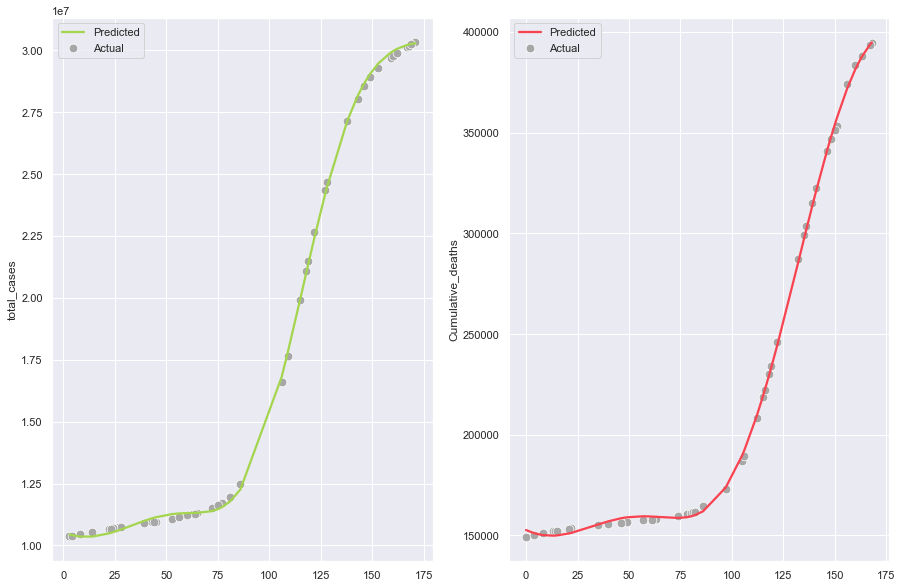

In [60]:
f, axes = plt.subplots(1, 2)
sns.scatterplot(india_x_test,india_y_test,color='#A7A7A7',s=75,label="Actual",ax=axes[0])
sns.lineplot(india_x_test,np.array(svr_india_pred1).reshape(-1),color="#A4D54E",linewidth=2.25,label="Predicted",ax=axes[0])
sns.scatterplot(india_x_test2,india_z_test,color='#A7A7A7',s=75,label="Actual",ax=axes[1])
sns.lineplot(india_x_test2,np.array(svr_india_pred2).reshape(-1),color="#F94350",linewidth=2.25,label="Predicted",ax=axes[1])

***R square***

In [61]:
print("R square score for total cases",r2_score(india_y_test, svr_india_pred1)*100)
print("R square score for total cases",r2_score(india_z_test, svr_india_pred2)*100)

R square score for total cases 99.96706834056096
R square score for total cases 99.95339182592848


***Cross Validation***

In [62]:
svr_scores1 = cross_val_score(svm, np.array(svr_x_train1).reshape(-1,1), np.array(svr_y_train1).reshape(-1,1), scoring='r2', cv=5)
print("Cross Validation scores for total cases :",svr_scores1)
print("Mean of cross validation scores for total cases= ",np.mean(svr_scores1),'\n')
svr_scores2 = cross_val_score(svm, np.array(svr_x_train1).reshape(-1,1), np.array(svr_y_train1).reshape(-1,1), scoring='r2', cv=5)
print("Cross Validation scores for cumulative deaths :",svr_scores2)
print("Mean of cross validation scores for cumulative deaths= ",np.mean(svr_scores2))

Cross Validation scores for total cases : [0.99950344 0.99952529 0.99957538 0.99961452 0.99960672]
Mean of cross validation scores for total cases=  0.9995650691180685 

Cross Validation scores for cumulative deaths : [0.99950344 0.99952529 0.99957538 0.99961452 0.99960672]
Mean of cross validation scores for cumulative deaths=  0.9995650691180685


***Learning curve***

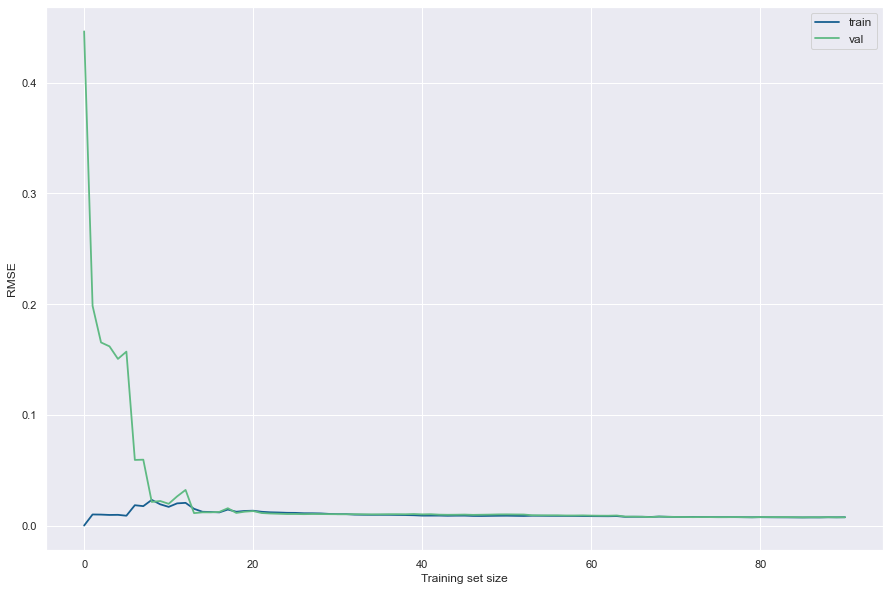

In [63]:
plot_learning_curves(svm,np.array(svr_x_train1).reshape(-1,1),np.array(svr_y_train1).reshape(-1,1))

***Mean absolute percentage error***

In [64]:
print("MAPE of confirmed casses is ",MAPE(india_y_test,svr_india_pred1)*100, " %")
print("Accuracy for confirmed cases is: ",(1-MAPE(india_y_test,svr_india_pred1))*100,"\n")
print("MAPE of deaths is ",MAPE(india_z_test,svr_india_pred2)*100, " %")
print("Accuracy for deaths is: ",(1-MAPE(india_z_test,svr_india_pred2))*100)

MAPE of confirmed casses is  0.885672882524249  %
Accuracy for confirmed cases is:  99.11432711747575 

MAPE of deaths is  0.837310597151194  %
Accuracy for deaths is:  99.1626894028488


### Asian countries(except India) Prediction

In [65]:
asia=['China','India','Hong Kong','Indonesia','Pakistan','Japan','Philippines','Vietnam','Turkey','Iran','Thailand','Myanmar','South Korea','Iraq','Afghanistan','Saudi Arabia','Malaysia','Yemen','Nepal','Sri lanka','Kazakhstan','Syria','Jordan','Israel','Singapore','Laos','Lebanon','Oman','United Arab Emirates','Kuwait','Georgia','Mangolia','Armenia','Qatar','Russia','Bahrain','Timor-Leste','Cyprus','Bhutan','Maldives','Brunei','Taiwan']
asia_case=covid[covid['Country'].isin(asia)]

In [66]:
#Select all countries except India 
except_india_asia=asia_case[asia_case['Country']!='India']
from sklearn.model_selection import train_test_split
import datetime as dt
#except_india_asia['date']=pd.to_datetime(except_india_asia['date'])

In [67]:
import warnings
warnings.filterwarnings('ignore')
#except_india_asia['date']=except_india_asia['date'].map(dt.datetime.toordinal)

Our dataset contains all the continents and each continent has many countries. We require a data such that for each date the total number of cases by continent are known. Using pandas_df.groupby([]) helps us achieve this. It is similar to GROUP BY in SQL

In [68]:
grouped_data=except_india_asia.groupby(['date'],as_index=False,sort=False).sum()
grouped_data

,date,total_cases,Recovered,Cumulative_deaths,Active Cases,Death Rate(%),Increase,day_xth,Population_1k,Cases/1000s
0,01-01-2021,12382883,10812295,229111,1341477,81.133399,78853,10978,2966643,583.325587
1,02-01-2021,12458059,10883458,230338,1344263,81.075809,75176,11013,2966643,586.313750
2,03-01-2021,12530462,10963292,231563,1335607,80.814883,72403,11048,2966643,589.524320
3,04-01-2021,12607170,11029848,232829,1344493,80.707783,76708,11083,2966643,592.862726
4,05-01-2021,12691213,11098034,234185,1358994,80.668173,84043,11118,2966643,596.858030
...,...,...,...,...,...,...,...,...,...,...
179,29-06-2021,28266944,26109367,486513,1671064,69.514703,100650,17243,2966643,1367.718942
180,30-06-2021,28367240,26189171,488366,1689703,69.519696,100296,17278,2966643,1371.117111
181,01-07-2021,28479005,26265998,490268,1722739,69.516039,111765,17313,2966643,1374.616232
182,02-07-2021,28590945,26344382,492197,1754366,69.501700,111940,17348,2966643,1377.901663


***Data Visualisation***

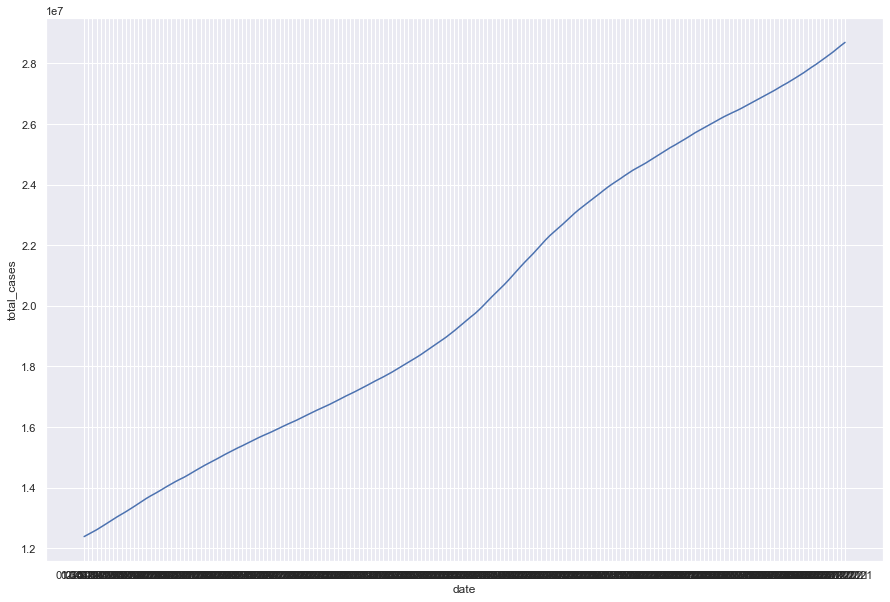

In [69]:
#Plotting confirmed cases per day vs date
sns.lineplot(x="date",y="total_cases",data=grouped_data)
plt.show()

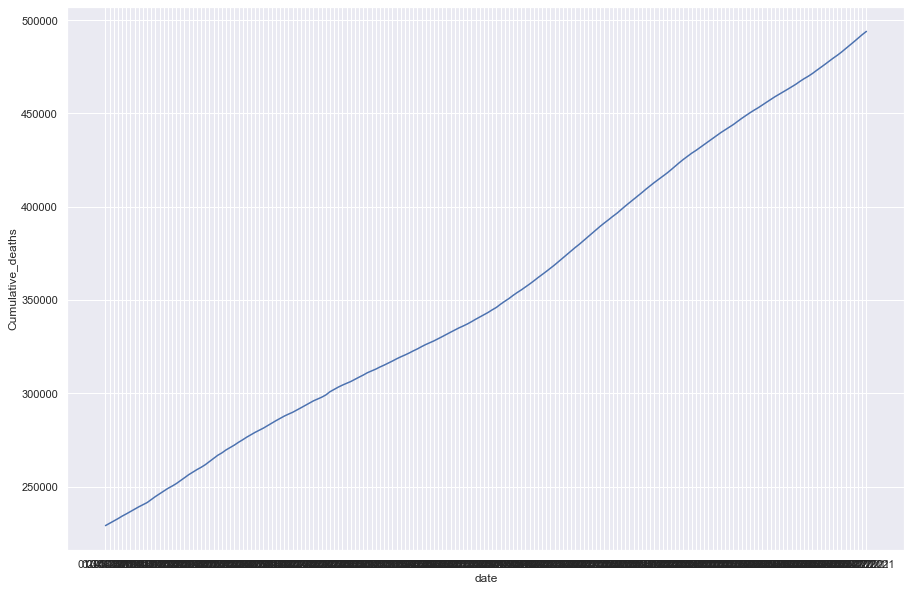

In [70]:
#Plotting confirmed cases per day vs date
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="Cumulative_deaths",data=grouped_data)
plt.show()

In [71]:
start=0
dateHI2=[]
for i in range(0,len(grouped_data.index)):
    dateHI2.append(start+i)
grouped_data['datess']=dateHI2
x=np.array(dateHI2)
asiaE_x=x
asiaE_y=grouped_data['total_cases']
asiaE_z=grouped_data['Cumulative_deaths']
asiaE_x_train,asiaE_x_test,asiaE_y_train,asiaE_y_test=train_test_split(asiaE_x,asiaE_y,test_size=0.25)
asiaE_x_train2,asiaE_x_test2,asiaE_z_train,asiaE_z_test=train_test_split(asiaE_x,asiaE_z,test_size=0.25)

***Fitting the linear model on training dataset and predicting***

In [72]:
lr=LinearRegression()
lr.fit(np.array(asiaE_x_train).reshape(-1,1),np.array(asiaE_y_train).reshape(-1,1))
lr_asiaE_pred1=lr.predict(np.array(asiaE_x_test).reshape(-1,1))
lr.fit(np.array(asiaE_x_train2).reshape(-1,1),np.array(asiaE_z_train).reshape(-1,1))
lr_asiaE_pred2=lr.predict(np.array(asiaE_x_test2).reshape(-1,1))

***Plot - Asia(except India)***

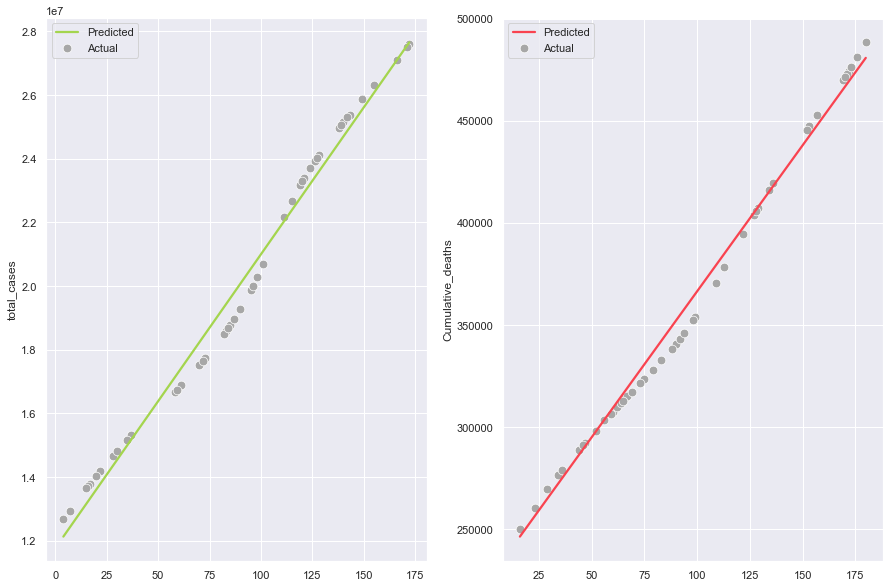

In [73]:
lr_asiaE_pred1=np.array(lr_asiaE_pred1).reshape(-1)
lr_asiaE_pred2=np.array(lr_asiaE_pred2).reshape(-1)
f, axes = plt.subplots(1, 2)
sns.scatterplot(asiaE_x_test,asiaE_y_test,color='#A7A7A7',s=75,legend="brief",label="Actual",ax=axes[0])
sns.lineplot(asiaE_x_test,lr_asiaE_pred1,color="#A4D54E",linewidth=2.25,label="Predicted",ax=axes[0])
sns.scatterplot(asiaE_x_test2,asiaE_z_test,color='#A7A7A7',s=75,legend="brief",label="Actual")
sns.lineplot(asiaE_x_test2,lr_asiaE_pred2,color="#F94350",linewidth=2.25,label="Predicted")
plt.show()

***Mean absolute percentage error***

In [74]:
print("MAPE of confirmed casses is ",MAPE(asiaE_y_test,lr_asiaE_pred1)*100, " %")
print("Accuracy for confirmed cases is: ",(1-MAPE(asiaE_y_test,lr_asiaE_pred1))*100,"\n")
print("MAPE of deaths is ",MAPE(asiaE_z_test,lr_asiaE_pred2)*100, " %")
print("Accuracy for deaths is: ",(1-MAPE(asiaE_z_test,lr_asiaE_pred2))*100)

MAPE of confirmed casses is  2.5560823026173156  %
Accuracy for confirmed cases is:  97.44391769738269 

MAPE of deaths is  1.4106094885505003  %
Accuracy for deaths is:  98.58939051144951


***Calculating R square***

In [75]:
score_pr_india1=r2_score(asiaE_y_test, lr_asiaE_pred1)*100
score_pr_india2=r2_score(asiaE_z_test, lr_asiaE_pred2)*100
print('R square score for total cases=',score_pr_india1)
print('R square score for cumulative deaths=',score_pr_india2)

R square score for total cases= 98.64234149312519
R square score for cumulative deaths= 99.26023805136118


***Cross Validation***

In [76]:
lr_scores_asiaE1 = cross_val_score(lr, np.array(asiaE_x_train).reshape(-1,1), np.array(asiaE_y_train).reshape(-1,1), scoring='r2', cv=5)
print("Cross Validation scores for total cases :",lr_scores_asiaE1)
print("Mean of cross validation scores for total cases= ",np.mean(lr_scores_asiaE1),'\n')
lr_scores_asiaE2 = cross_val_score(lr, np.array(asiaE_x_train2).reshape(-1,1), np.array(asiaE_z_train).reshape(-1,1), scoring='r2', cv=5)
print("Cross Validation scores for cumulative deaths :",lr_scores_asiaE2)
print("Mean of cross validation scores for cumulative deaths= ",np.mean(lr_scores_asiaE2))

Cross Validation scores for total cases : [0.9852611  0.99129583 0.99376445 0.99286719 0.99462777]
Mean of cross validation scores for total cases=  0.9915632689610978 

Cross Validation scores for cumulative deaths : [0.99514578 0.99468663 0.99396438 0.99127588 0.99303288]
Mean of cross validation scores for cumulative deaths=  0.9936211094705991


***Learning curve***

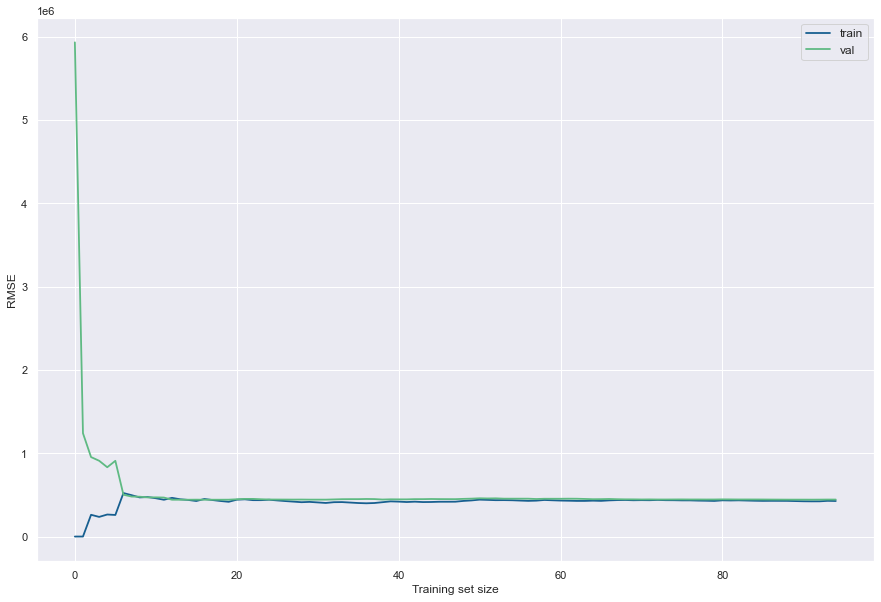

In [77]:
plot_learning_curves(lr,np.array(asiaE_x_train).reshape(-1,1),np.array(asiaE_y_train).reshape(-1,1))

### Polynomial Regression

***Adding extra feature***

In [78]:
poly2=PolynomialFeatures(degree=2)
pr_x_asia=poly.fit_transform(np.array(asiaE_x_train).reshape(-1,1))
pr_x_asia2=poly.fit_transform(np.array(asiaE_x_train2).reshape(-1,1))

***Training the model***

In [79]:
Pr=LinearRegression()
Pr.fit(pr_x_asia,np.array(asiaE_y_train).reshape(-1,1))
pr_asiaE_pred1=np.array(Pr.predict(poly.fit_transform(np.array(asiaE_x_test).reshape(-1,1)))).reshape(-1)
Pr.fit(pr_x_asia2,np.array(asiaE_z_train).reshape(-1,1))
pr_asiaE_pred2=np.array(Pr.predict(poly.fit_transform(np.array(asiaE_x_test2).reshape(-1,1)))).reshape(-1)

***Plot***

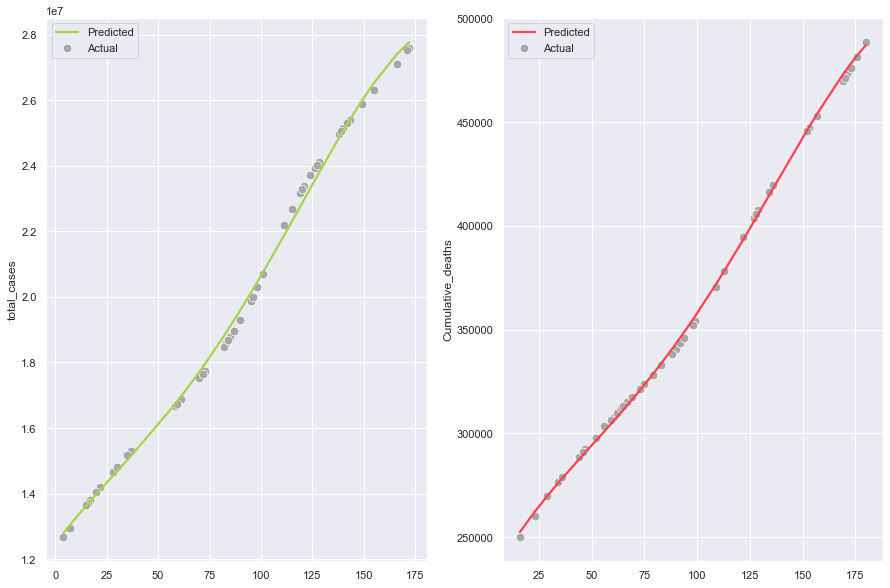

In [80]:
f, axes = plt.subplots(1, 2)
sns.scatterplot(asiaE_x_test,asiaE_y_test,color='#A7A7A7',s=75,legend="brief",label="Actual",ax=axes[0])
sns.lineplot(asiaE_x_test,pr_asiaE_pred1,color="#A4D54E",linewidth=2.25,label="Predicted",ax=axes[0])
sns.scatterplot(asiaE_x_test2,asiaE_z_test,color='#A7A7A7',s=75,legend="brief",label="Actual",ax=axes[1])
sns.lineplot(asiaE_x_test2,pr_asiaE_pred2,color="#F94350",linewidth=2.25,label="Predicted",ax=axes[1])
plt.show()

***Mean absolute percentage error***

In [81]:
print("MAPE of confirmed casses is ",MAPE(asiaE_y_test,pr_asiaE_pred1)*100, " %")
print("Accuracy for confirmed cases is: ",(1-MAPE(asiaE_y_test,pr_asiaE_pred1))*100,"\n")
print("MAPE of deaths is ",MAPE(asiaE_z_test,pr_asiaE_pred2)*100, " %")
print("Accuracy for deaths is: ",(1-MAPE(asiaE_z_test,pr_asiaE_pred2))*100)

MAPE of confirmed casses is  0.9668035176947609  %
Accuracy for confirmed cases is:  99.03319648230524 

MAPE of deaths is  0.4544117444164522  %
Accuracy for deaths is:  99.54558825558355


***R square***

In [82]:
score_pr_india1=r2_score(asiaE_y_test, pr_asiaE_pred1)*100
score_pr_india2=r2_score(asiaE_z_test, pr_asiaE_pred2)*100
print('R square score for total cases=',score_pr_india1)
print('R square score for cumulative deaths=',score_pr_india2)

R square score for total cases= 99.719451747419
R square score for cumulative deaths= 99.93508101969962


***Cross Validation***

In [83]:
pr_scores_asiaE1 = cross_val_score(Pr, pr_x_asia, np.array(asiaE_y_train).reshape(-1,1), scoring='r2', cv=5)
print("Cross Validation scores for total case ",pr_scores_asiaE1)
print("The mean score after cross validation for total cases is",np.mean(pr_scores_asiaE1),"\n")
pr_scores_asiaE2 = cross_val_score(Pr, pr_x_asia2, np.array(asiaE_z_train).reshape(-1,1), scoring='r2', cv=5)
print("Cross Validation scores for total case ",pr_scores_asiaE2)
print("The mean score after cross validation for total cases is",np.mean(pr_scores_asiaE2))

Cross Validation scores for total case  [0.99701732 0.99857822 0.99847942 0.997811   0.99772043]
The mean score after cross validation for total cases is 0.997921277581988 

Cross Validation scores for total case  [0.99962184 0.9995181  0.99945027 0.99935721 0.99936908]
The mean score after cross validation for total cases is 0.9994632996915211


***Learning Curve***

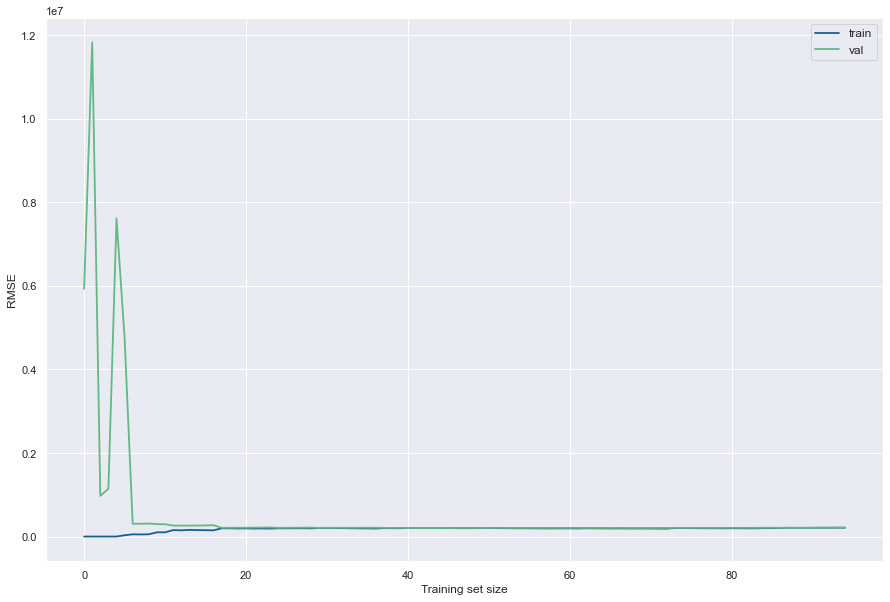

In [84]:
plot_learning_curves(Pr,pr_x_asia,np.array(asiaE_y_train).reshape(-1,1))

</br>

### ARIMA Model 

In [85]:
#Performing ADF test
from statsmodels.tsa.stattools import adfuller
from numpy import log
adf_data=asiaE_y
result = adfuller(adf_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.278077
p-value: 0.996483


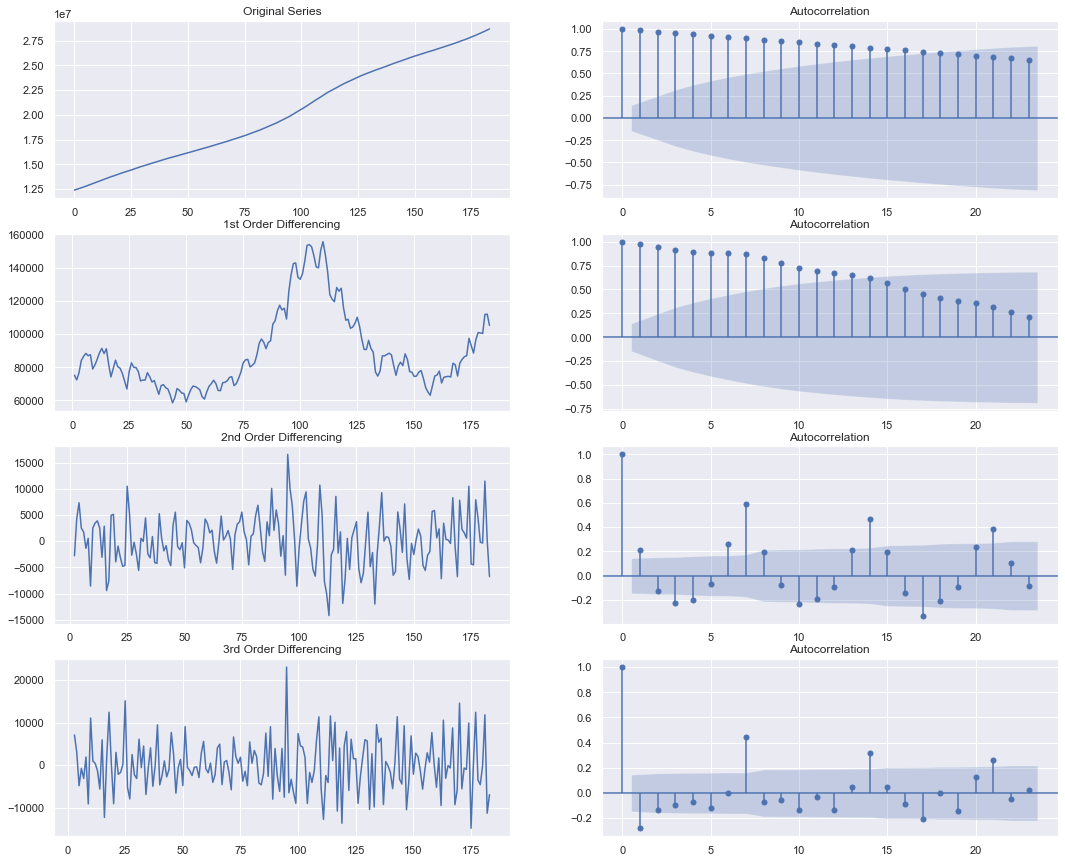

In [86]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(18,15)})
# Original Series
fig, axes = plt.subplots(4, 2)
axes[0, 0].plot(adf_data); axes[0, 0].set_title('Original Series')
plot_acf(adf_data, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(adf_data.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(adf_data.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(adf_data.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(adf_data.diff().diff().dropna(), ax=axes[2, 1])

#3rd Differencing
axes[3, 0].plot(adf_data.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(adf_data.diff().diff().diff().dropna(), ax=axes[3, 1])

plt.show()

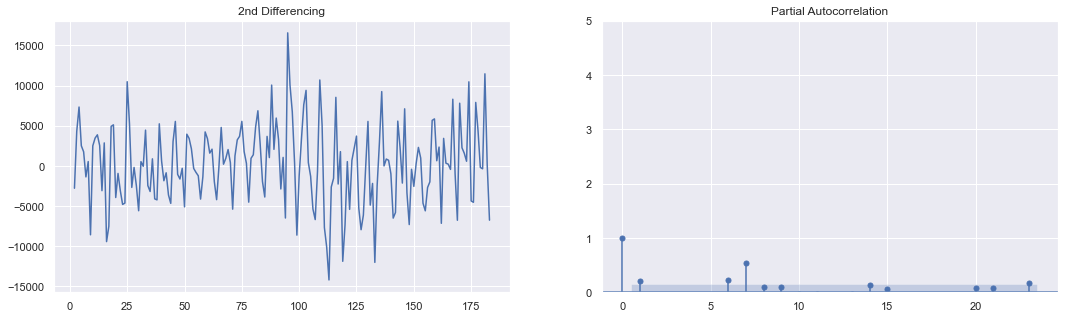

In [87]:
# PACF plot of 2nd differenced series
sns.set(rc={'figure.figsize':(18,5)})

fig, axes = plt.subplots(1, 2)
axes[0].plot(adf_data.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(adf_data.diff().diff().dropna(), ax=axes[1])

plt.show()

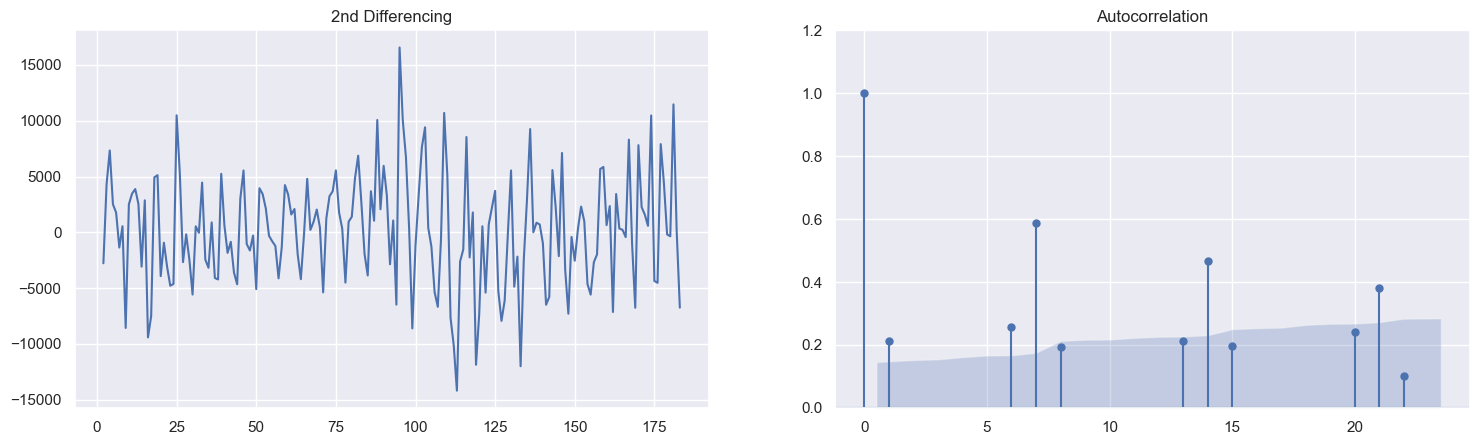

In [88]:
plt.rcParams.update({'figure.figsize':(18,5), 'figure.dpi':100})

fig, axes = plt.subplots(1, 2)
axes[0].plot(adf_data.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(adf_data.diff().diff().dropna(), ax=axes[1])

plt.show()

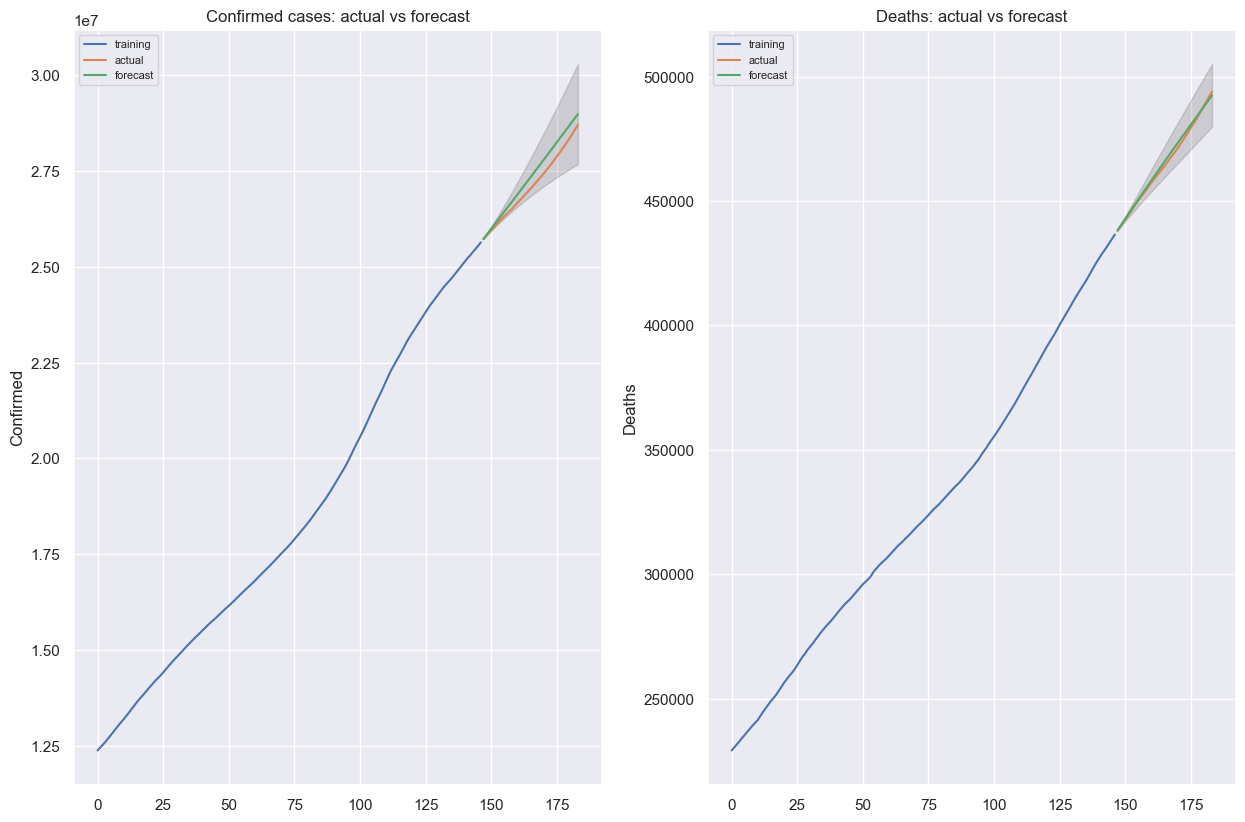

In [89]:
from statsmodels.tsa.arima_model import ARIMA
sns.set(rc={'figure.figsize':(15,10)})

warnings.filterwarnings('ignore')
#Splitting dataset
split=int(len(grouped_data)*0.8)
arima_train=grouped_data[:split]['total_cases']
arima_test=grouped_data[split:]['total_cases']
arima_death_train=grouped_data[:split]['Cumulative_deaths']
arima_death_test=grouped_data[split:]['Cumulative_deaths']

# 1,2,2 ARIMA Model for confirmed cases
model = ARIMA(arima_train, order=(1,2,2))
confirmed = model.fit(disp=-1)
# Forecast
conf_fc, se, conf_ci = confirmed.forecast(len(grouped_data)-split,alpha=0.05)  # 95% conf

# Make as pandas series
conf_fc = pd.Series(conf_fc, index=arima_test.index)
conf_low = pd.Series(conf_ci[:, 0], index=arima_test.index)
conf_high = pd.Series(conf_ci[:, 1], index=arima_test.index)

# 1,2,2 ARIMA Model for deaths cases
model = ARIMA(arima_death_train, order=(1,1,1))
deaths = model.fit(disp=-1)
# Forecast
death_fc, se, death_ci = deaths.forecast(len(grouped_data)-split,alpha=0.05)  # 95% conf

# Make as pandas series
death_fc = pd.Series(death_fc, index=arima_death_test.index)
death_low = pd.Series(death_ci[:, 0], index=arima_death_test.index)
death_high = pd.Series(death_ci[:, 1], index=arima_death_test.index)


# Plot
f, axes = plt.subplots(1, 2)
axes[0].plot(arima_train, label='training')
axes[0].plot(arima_test, label='actual')
axes[0].plot(conf_fc, label='forecast')
axes[0].fill_between(conf_low.index, conf_low, conf_high, 
                 color='k', alpha=.15)
axes[0].set_title('Confirmed cases: actual vs forecast')
axes[0].set_ylabel('Confirmed')
axes[0].legend(loc='upper left', fontsize=8)
axes[1].plot(arima_death_train, label='training')
axes[1].plot(arima_death_test, label='actual')
axes[1].plot(death_fc, label='forecast')
axes[1].fill_between(death_low.index, death_low, death_high, 
                 color='k', alpha=.15)
axes[1].set_ylabel('Deaths')
axes[1].set_title('Deaths: actual vs forecast')
axes[1].legend(loc='upper left', fontsize=8)
plt.show()

In [90]:
print("MAPE of confirmed casses is ",MAPE(arima_test,conf_fc)*100, " %")
print("Accuracy for confirmed cases is: ",(1-MAPE(arima_test,conf_fc))*100,"\n")
print("MAPE of deaths is ",MAPE(arima_death_test,death_fc)*100, " %")
print("Accuracy for deaths is: ",(1-MAPE(arima_death_test,death_fc))*100)

MAPE of confirmed casses is  0.8875805114119377  %
Accuracy for confirmed cases is:  99.11241948858806 

MAPE of deaths is  0.21886992609681863  %
Accuracy for deaths is:  99.78113007390319


### Multilayer Perceptron

In [91]:
## For confirmed cases

from sklearn.preprocessing import MinMaxScaler
#Take 10 steps to predict the 11th data point
n_steps = 10
n_features = 1 
#Splitting training and testing data
size_x_Train=len(asiaE_x)-n_steps
mlp_asia_y=np.array(asiaE_y).reshape(-1,1)
mlp_train=mlp_asia_y[:size_x_Train]
mlp_test=mlp_asia_y[size_x_Train:]
#Scaling data
mlp_scaler=MinMaxScaler()
mlp_scaler=mlp_scaler.fit(mlp_train)
mlp_train=mlp_scaler.transform(mlp_train)
mlp_test=mlp_scaler.transform(mlp_test)

In [92]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input=n_steps
generator = TimeseriesGenerator(mlp_train,mlp_train,length = n_input,batch_size=1)
print(len(generator))
for i in range(len(generator)-2,len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

164
[[[0.9427702 ]
  [0.94760271]
  [0.95245776]
  [0.9573275 ]
  [0.96216916]
  [0.9675535 ]
  [0.97287414]
  [0.97775323]
  [0.98314267]
  [0.98868007]]] => [[0.9943209]]
[[[0.94760271]
  [0.95245776]
  [0.9573275 ]
  [0.96216916]
  [0.9675535 ]
  [0.97287414]
  [0.97775323]
  [0.98314267]
  [0.98868007]
  [0.9943209 ]]] => [[1.]]


In [93]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten

model = Sequential()
model.add(Dense(192, activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

In [94]:
val_set = np.append(mlp_train[-1],mlp_test)
val_set=val_set.reshape(n_steps+1,1)
val_set

array([[1.        ],
       [1.00636329],
       [1.01244202],
       [1.01822525],
       [1.02452511],
       [1.03111255],
       [1.0376879 ],
       [1.04424013],
       [1.05154161],
       [1.05885453],
       [1.06572654]])

In [95]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(val_set,val_set,length = n_input,batch_size=1)

In [96]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=25,restore_best_weights=True)

# fit the model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)

Epoch 1/200
10/10 [==============================] - 1s 37ms/step - loss: 0.1019 - val_loss: 0.0396
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0130 - val_loss: 1.5787e-04
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.0530
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0060 - val_loss: 3.9679e-04
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 5.1586e-04 - val_loss: 3.1820e-04
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 7.6710e-05 - val_loss: 2.9312e-06
Epoch 8/200
10/10 [==============================] - 0s 5ms/step - loss: 8.8865e-05 - val_loss: 6.4389e-06
Epoch 9/200
10/10 [==============================] - 0s 5ms/step - loss: 1.9034e-04 - val_loss: 2.7552e-04
Epoch 10/200
10/10 [==============================] - 0s 5ms/step - 

<AxesSubplot:title={'center':'Loss vs epochs curve'}>

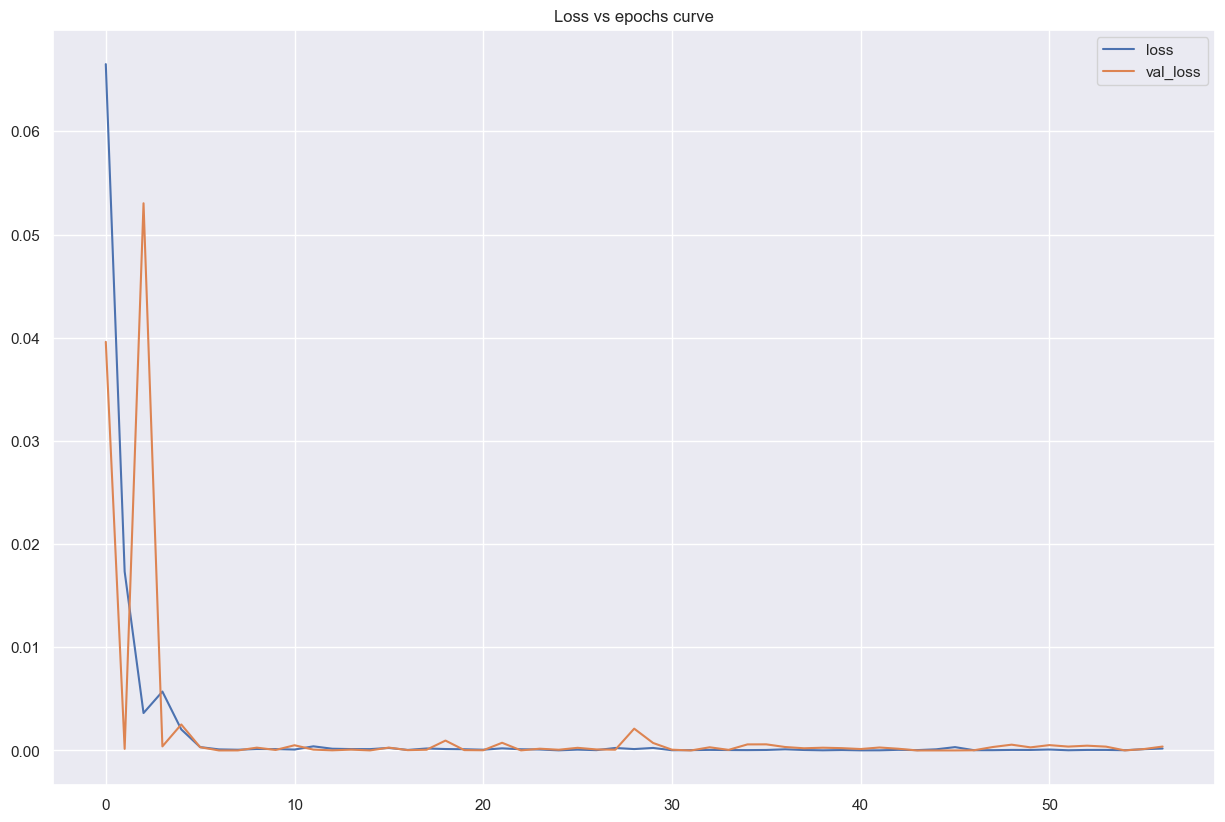

In [97]:
pd.DataFrame(model.history.history).plot(title="Loss vs epochs curve")

In [98]:
# list of predictions
mlp_pred = []

# last `n_input` points from training set
test_batch = mlp_train[-n_input:].reshape(1,n_input,n_features)

test_batch.shape

(1, 10, 1)

In [99]:
# forecast the number of confirmed cases in India for the validation set and the next 50 days

for i in range(n_steps+50):
    batch_pred = model.predict(test_batch)[0]
    mlp_pred.append(batch_pred)
    test_batch = np.append(test_batch[:,1:,:],[[batch_pred]],axis=1)

mlp_pred

[array([1.0151725], dtype=float32),
 array([1.0206064], dtype=float32),
 array([1.0268959], dtype=float32),
 array([1.0332401], dtype=float32),
 array([1.0389749], dtype=float32),
 array([1.0457251], dtype=float32),
 array([1.0519547], dtype=float32),
 array([1.0592623], dtype=float32),
 array([1.0664054], dtype=float32),
 array([1.0729872], dtype=float32),
 array([1.0806034], dtype=float32),
 array([1.0867678], dtype=float32),
 array([1.0932598], dtype=float32),
 array([1.0997678], dtype=float32),
 array([1.1061829], dtype=float32),
 array([1.1129204], dtype=float32),
 array([1.1194229], dtype=float32),
 array([1.1261213], dtype=float32),
 array([1.1326947], dtype=float32),
 array([1.1391071], dtype=float32),
 array([1.1456556], dtype=float32),
 array([1.1519548], dtype=float32),
 array([1.1583257], dtype=float32),
 array([1.1646787], dtype=float32),
 array([1.1710026], dtype=float32),
 array([1.1773736], dtype=float32),
 array([1.1836728], dtype=float32),
 array([1.1899625], dtype=fl

In [100]:
# apply inverse transformations on scaled data
mlp_pred = mlp_scaler.inverse_transform(mlp_pred)
mlp_pred[:,0]

array([27922296.69351673, 28005474.56376386, 28101748.7105782 ,
       28198860.42057276, 28286643.97593284, 28389970.80617094,
       28485328.92528057, 28597186.49161339, 28706527.71889281,
       28807276.16836047, 28923858.0289712 , 29018218.00633883,
       29117592.41424942, 29217211.33951545, 29315408.77955842,
       29418540.36086345, 29518075.34733582, 29620608.40854692,
       29721229.12506771, 29819384.59571385, 29919623.93815041,
       30016045.89023185, 30113566.34565639, 30210813.08762336,
       30307614.58903265, 30405136.86921358, 30501558.82129502,
       30597836.61762214, 30693223.93283391, 30787806.53048038,
       30882482.19070244, 30976283.79261661, 31070074.44599247,
       31163516.57089901, 31256462.36206913, 31349209.25479341,
       31441448.86524296, 31533336.29771042, 31624692.72607017,
       31715583.84155202, 31806206.71784544, 31896311.36332583,
       31986087.55265713, 32075476.89363503, 32164442.89113188,
       32253034.81357002, 32341210.69155

In [101]:
last_day=size_x_Train
future=asiaE_x[last_day:]
for i in range(len(asiaE_x),len(asiaE_x)+50):
    future=np.append(future,i)
print(future)

[174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233]


In [102]:
from itertools import repeat
mlp_conf_df = pd.DataFrame(columns=["Confirmed","Confirmed_predicted"],index=future)
mlp_conf_df.loc[:,"Confirmed_predicted"] = mlp_pred[:,0]
test_set=grouped_data.iloc[size_x_Train:]['total_cases'].values.tolist()
nan_list=[]
nan_list=nan_list.extend(repeat(None,50))
mlp_conf_df.loc[:,"Confirmed"] =grouped_data.iloc[size_x_Train:]['total_cases'].values.tolist()+[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]

In [103]:
## For death cases

mlp_deaths_asia=np.array(asiaE_z).reshape(-1,1)
mlp_deaths_train=mlp_deaths_asia[:size_x_Train]
mlp_deaths_test=mlp_deaths_asia[size_x_Train:]
#Scaling data
mlp_scaler2=MinMaxScaler()
mlp_scaler2=mlp_scaler2.fit(mlp_deaths_train)
mlp_deaths_train=mlp_scaler2.transform(mlp_deaths_train)
mlp_deaths_test=mlp_scaler2.transform(mlp_deaths_test)

In [104]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input=n_steps
generator = TimeseriesGenerator(mlp_deaths_train,mlp_deaths_train,length = n_input,batch_size=1)
for i in range(len(generator)-2,len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

[[[0.93523427]
  [0.94045875]
  [0.94588152]
  [0.95137714]
  [0.95684038]
  [0.96316965]
  [0.96904163]
  [0.97429443]
  [0.9802433 ]
  [0.98694083]]] => [[0.99332675]]
[[[0.94045875]
  [0.94588152]
  [0.95137714]
  [0.95684038]
  [0.96316965]
  [0.96904163]
  [0.97429443]
  [0.9802433 ]
  [0.98694083]
  [0.99332675]]] => [[1.]]


In [105]:
val_set = np.append(mlp_deaths_train[-1],mlp_deaths_test)
val_set=val_set.reshape(n_steps+1,1)

In [106]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(val_set,val_set,length = n_input,batch_size=1)

In [107]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=25,restore_best_weights=True)

# fit the model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)

Epoch 1/200
10/10 [==============================] - 0s 8ms/step - loss: 1.2455e-04 - val_loss: 3.9751e-06
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 1.2640e-04 - val_loss: 3.7602e-04
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 7.9853e-05 - val_loss: 0.0011
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 9.9958e-05 - val_loss: 0.0012
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 3.2747e-04 - val_loss: 1.4850e-04
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 1.2102e-04 - val_loss: 1.4184e-04
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 1.2478e-04 - val_loss: 1.8280e-05
Epoch 8/200
10/10 [==============================] - 0s 5ms/step - loss: 2.0350e-05 - val_loss: 1.9598e-04
Epoch 9/200
10/10 [==============================] - 0s 5ms/step - loss: 7.5646e-05 - val_loss: 1.0177e-04
Epoch 10/200
10/10 [=========================

In [108]:
# list of predictions
mlp_pred2 = []

# last `n_input` points from training set
test_batch = mlp_deaths_train[-n_input:].reshape(1,n_input,n_features)

test_batch.shape

(1, 10, 1)

In [109]:

# forecast the number of deaths in India for the validation set and the next 50 days

for i in range(n_steps+50):
    batch_pred = model.predict(test_batch)[0]
    mlp_pred2.append(batch_pred)
    test_batch = np.append(test_batch[:,1:,:],[[batch_pred]],axis=1)

In [110]:
# apply inverse transformations on scaled data
mlp_pred2 = mlp_scaler2.inverse_transform(mlp_pred2)
mlp_pred2[:,0]

array([479845.43616676, 481362.16466737, 483046.88832498, 484737.88639402,
       486310.28924966, 488101.50115776, 489790.28992701, 491723.89857173,
       493608.63750482, 495356.87116742, 497316.31389117, 498967.36781979,
       500684.40616918, 502404.36079431, 504105.93404508, 505874.61109519,
       507590.61843801, 509345.56837201, 511071.29663396, 512755.60788894,
       514466.84314418, 516128.05985188, 517804.9184022 , 519477.09323692,
       521139.48823786, 522808.92354083, 524456.91390705, 526104.78644395,
       527740.58147526, 529363.20907974, 530986.33745885, 532595.8860085 ,
       534203.81440496, 535804.46684074, 537396.7533946 , 538984.03220224,
       540561.17768812, 542132.69682384, 543696.67488289, 545253.43589592,
       546804.83567476, 548348.34088898, 549886.16083837, 551417.02885771,
       552940.32634306, 554457.52616096, 555967.33218884, 557470.98163462,
       558967.738065  , 560457.95496798, 561941.69125819, 563418.74073434,
       564889.60417104, 5

In [111]:
from itertools import repeat
mlp_deaths_df = pd.DataFrame(columns=["Deaths","Deaths_predicted"],index=future)
mlp_deaths_df.loc[:,"Deaths_predicted"] = mlp_pred2[:,0]
test_set=grouped_data.iloc[size_x_Train:]['Cumulative_deaths'].values.tolist()
nan_list=[]
nan_list=nan_list.extend(repeat(None,50))
mlp_deaths_df.loc[:,"Deaths"] =grouped_data.iloc[size_x_Train:]['Cumulative_deaths'].values.tolist()+[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]

<AxesSubplot:title={'center':'Death Predictions for next 50 days-MLP'}>

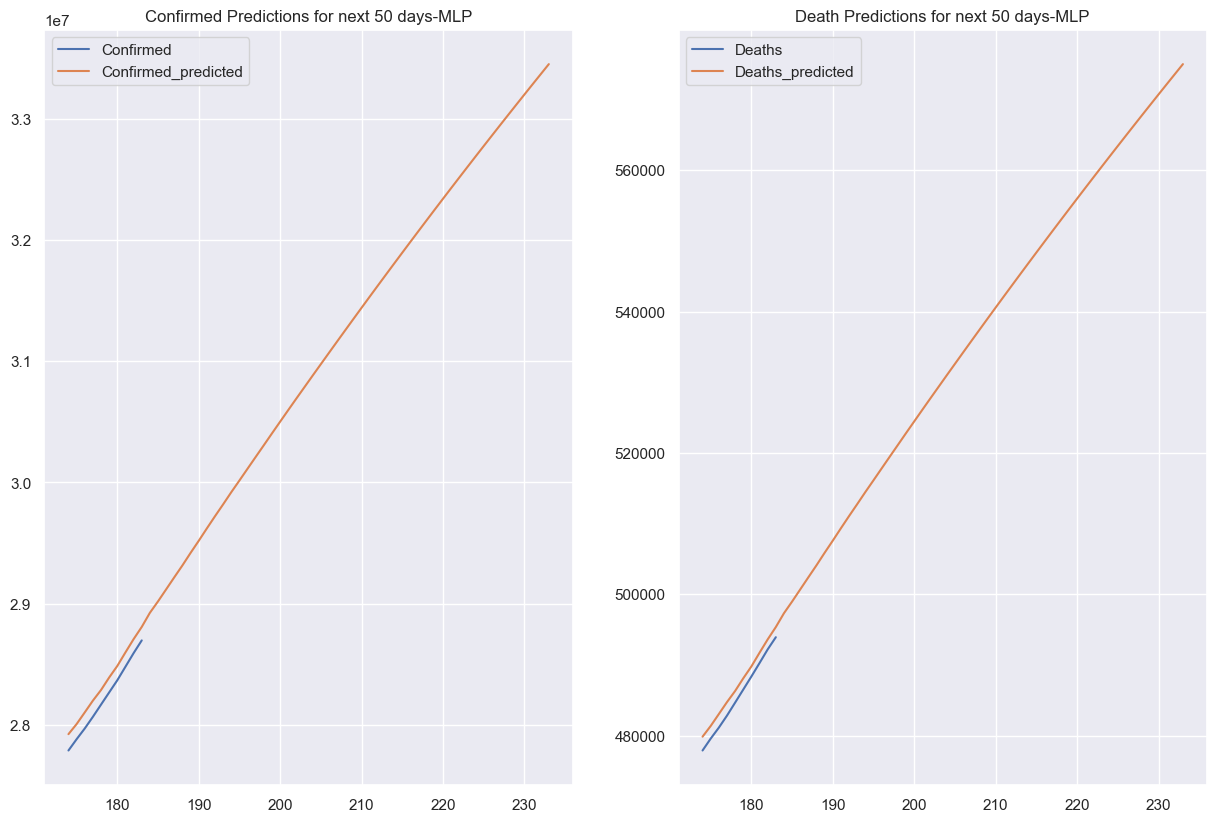

In [112]:
f, axes = plt.subplots(1, 2)
mlp_conf_df.plot(title="Confirmed Predictions for next 50 days-MLP",ax=axes[0])
mlp_deaths_df.plot(title="Death Predictions for next 50 days-MLP",ax=axes[1])

In [113]:
from itertools import repeat
present=future
present=np.append(np.arange(future[0]),future)
mlp = pd.DataFrame(columns=["Confirmed","Confirmed_predicted,Deaths,Deaths_predicted"],index=present)
mlp.loc[:future[0],"Confirmed"] = grouped_data.iloc[:size_x_Train+1]['total_cases'].values.tolist()
mlp.loc[:future[0],"Deaths"] = grouped_data.iloc[:size_x_Train+1]['Cumulative_deaths'].values.tolist()
nan_list=[]
nan_list.extend(repeat(None,174))
mlp.loc[:,"Confirmed_predicted"] =nan_list+ mlp_pred[:,0].tolist()
mlp.loc[:,"Deaths_predicted"] =nan_list+ mlp_pred2[:,0].tolist()
mlp

,Confirmed,"Confirmed_predicted,Deaths,Deaths_predicted",Deaths,Confirmed_predicted,Deaths_predicted
0,12382883,NaN,229111.0,NaN,NaN
1,12458059,NaN,230338.0,NaN,NaN
2,12530462,NaN,231563.0,NaN,NaN
3,12607170,NaN,232829.0,NaN,NaN
4,12691213,NaN,234185.0,NaN,NaN
...,...,...,...,...,...
229,NaN,NaN,NaN,3.311736e+07,569262.485999
230,NaN,NaN,NaN,3.320169e+07,570707.102954
231,NaN,NaN,NaN,3.328563e+07,572145.474955
232,NaN,NaN,NaN,3.336920e+07,573576.924484


<AxesSubplot:title={'center':'Time Forecasting'}>

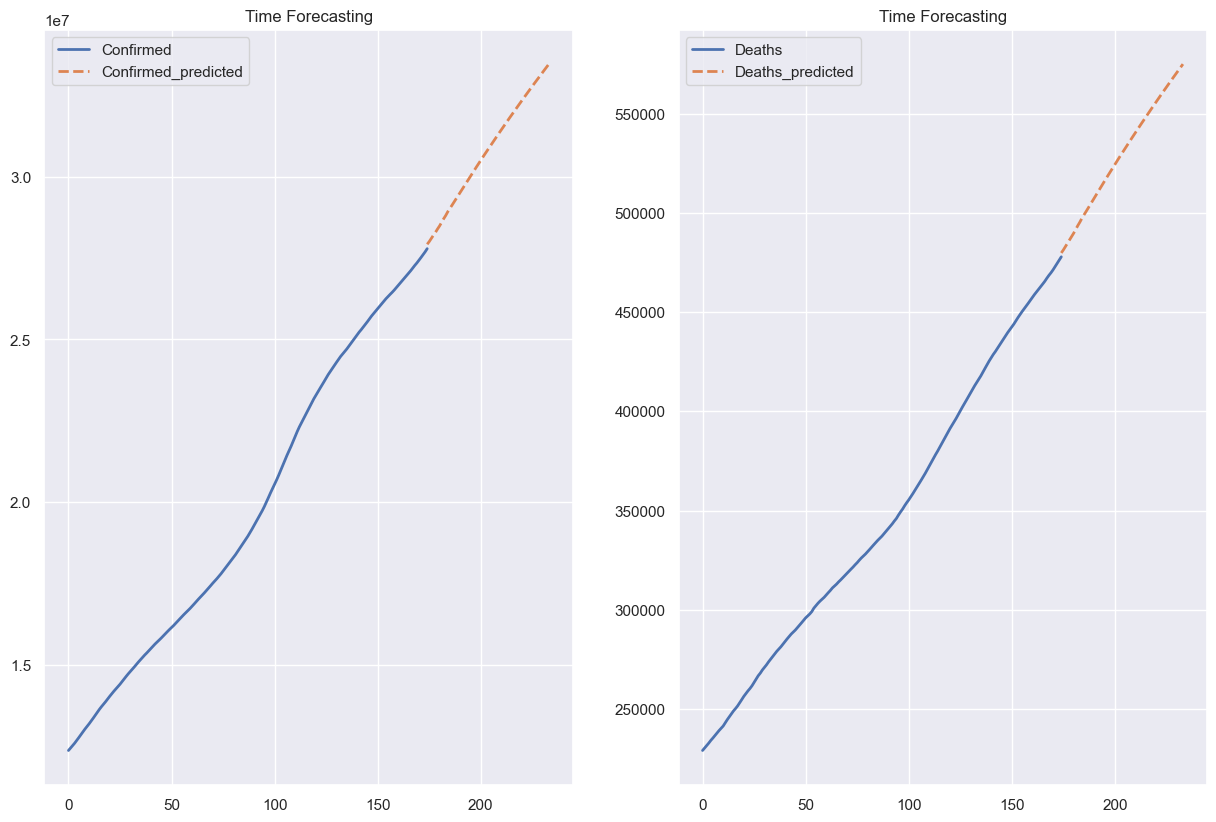

In [114]:
fig, axes = plt.subplots(1,2)
mlp.plot(y='Confirmed',ax=axes[0],linewidth=2).set_title('Time Forecasting')
mlp.plot(y='Confirmed_predicted',linestyle='dashed',ax=axes[0],linewidth=2)
mlp.plot(y='Deaths',ax=axes[1],linewidth=2).set_title('Time Forecasting')
mlp.plot(y='Deaths_predicted',linestyle='dashed',ax=axes[1],linewidth=2)

In [115]:
print("MAPE of confirmed casses is ",MAPE(mlp_conf_df["Confirmed"][:n_steps],mlp_conf_df["Confirmed_predicted"][:n_steps])*100," %")
print("Accuracy for confirmed cases is: ",(1-MAPE(mlp_conf_df["Confirmed"][:n_steps],mlp_conf_df["Confirmed_predicted"][:n_steps]))*100,"\n")
print("MAPE of deaths is ",MAPE(mlp_deaths_df["Deaths"][:n_steps],mlp_deaths_df["Deaths_predicted"][:n_steps]), " %")
print("Accuracy for deaths is: ",(1-MAPE(mlp_deaths_df["Deaths"][:n_steps],mlp_deaths_df["Deaths_predicted"][:n_steps]))*100)

MAPE of confirmed casses is  0.43687156210470424  %
Accuracy for confirmed cases is:  99.5631284378953 

MAPE of deaths is  0.003409565273299584  %
Accuracy for deaths is:  99.65904347267004


### Support Vector machine

***Training SVR and predicting***

In [116]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
scalerX1 = MinMaxScaler()
scalerY1 = MinMaxScaler()
scalerX2 = MinMaxScaler()
scalerY2 = MinMaxScaler()
svr_x_train1 = scalerX1.fit_transform(np.array(asiaE_x_train).reshape(-1,1))
svr_y_train1 = scalerY1.fit_transform(np.array(asiaE_y_train).reshape(-1,1))
svr_x_test1 = scalerX1.transform(np.array(asiaE_x_test).reshape(-1,1))
svr_y_test1 = scalerY1.transform(np.array(asiaE_y_test).reshape(-1,1))
svr_x_train2 = scalerX2.fit_transform(np.array(asiaE_x_train2).reshape(-1,1))
svr_z_train = scalerY2.fit_transform(np.array(asiaE_z_train).reshape(-1,1))
svr_x_test2 = scalerX2.transform(np.array(asiaE_x_test2).reshape(-1,1))
svr_z_test = scalerY2.transform(np.array(asiaE_z_test).reshape(-1,1))
svm=SVR(kernel="rbf", C=10,epsilon=0.001,gamma='scale')
svm.fit(svr_x_train1,svr_y_train1)
svr_asia_pred1=scalerY1.inverse_transform(np.array(svm.predict(svr_x_test1)).reshape(-1,1))
svr_asia_pred1=np.array(svr_asia_pred1).reshape(-1)
svm.fit(svr_x_train2,svr_z_train)
svr_asia_pred2=scalerY2.inverse_transform(np.array(svm.predict(svr_x_test2)).reshape(-1,1))
svr_asia_pred2=np.array(svr_asia_pred2).reshape(-1)

***Plot SVR Model***

<AxesSubplot:ylabel='Cumulative_deaths'>

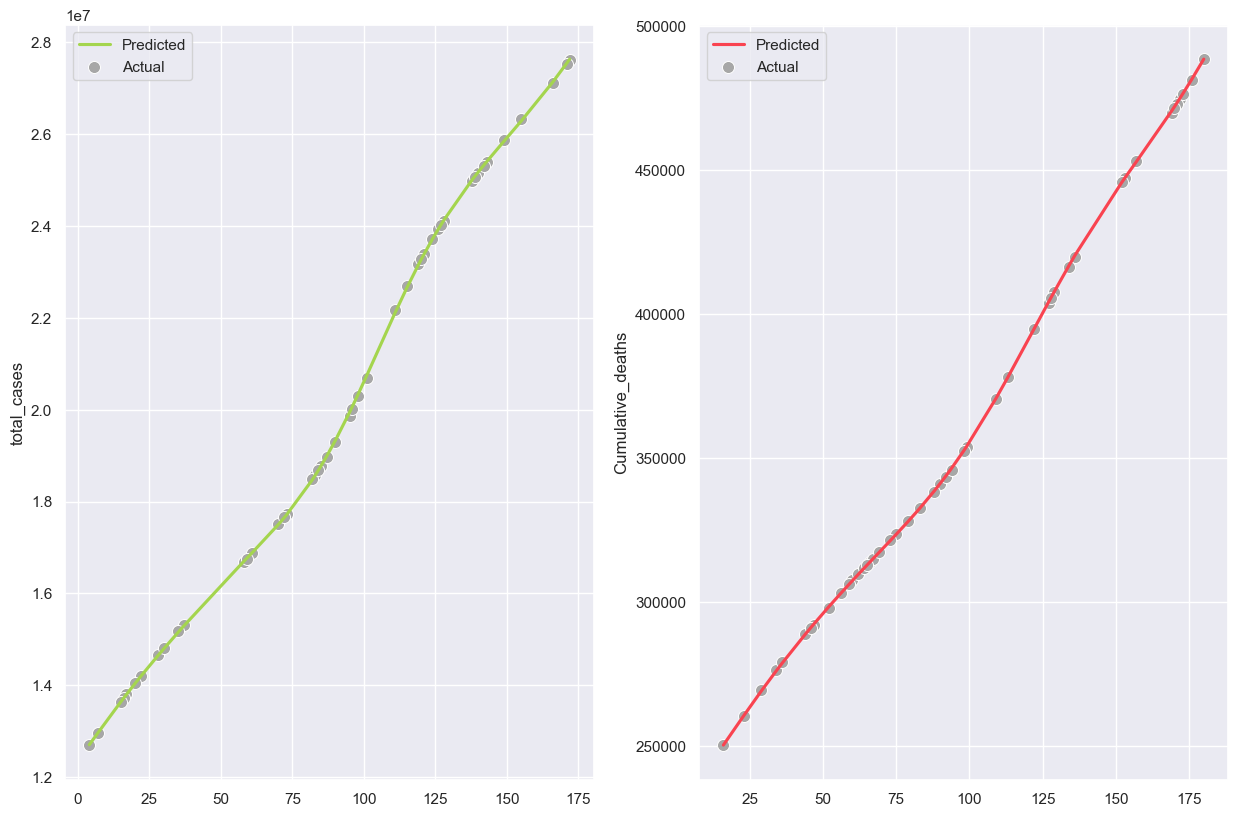

In [117]:
f, axes = plt.subplots(1, 2)
sns.scatterplot(asiaE_x_test,asiaE_y_test,color='#A7A7A7',s=75,label="Actual",ax=axes[0])
sns.lineplot(asiaE_x_test,svr_asia_pred1,color="#A4D54E",linewidth=2.25,label="Predicted",ax=axes[0])
sns.scatterplot(asiaE_x_test2,asiaE_z_test,color='#A7A7A7',s=75,label="Actual",ax=axes[1])
sns.lineplot(asiaE_x_test2,np.array(svr_asia_pred2).reshape(-1),color="#F94350",linewidth=2.25,label="Predicted",ax=axes[1])

***Mean absolute percentage error***

In [118]:
print("MAPE of confirmed casses is ",MAPE(asiaE_y_test,svr_asia_pred1)*100, " %")
print("Accuracy for confirmed cases is: ",(1-MAPE(asiaE_y_test,svr_asia_pred1))*100,"\n")
print("MAPE of deaths is ",MAPE(asiaE_z_test,svr_asia_pred2)*100, " %")
print("Accuracy for deaths is: ",(1-MAPE(asiaE_z_test,svr_asia_pred2))*100)

MAPE of confirmed casses is  0.1101941998826277  %
Accuracy for confirmed cases is:  99.88980580011737 

MAPE of deaths is  0.08101474012939863  %
Accuracy for deaths is:  99.9189852598706


***R Square***

In [119]:
print("R square score for total cases",r2_score(asiaE_y_test, svr_asia_pred1)*100)
print("R square score for total cases",r2_score(asiaE_z_test, svr_asia_pred2)*100)

R square score for total cases 99.9961745937203
R square score for total cases 99.99760346307538


***Cross Validation***

In [120]:
svr_scores1 = cross_val_score(svm, np.array(svr_x_train1).reshape(-1,1), np.array(svr_y_train1).reshape(-1,1), scoring='r2', cv=5)
print("Cross Validation scores for total cases :",svr_scores1)
print("Mean of cross validation scores for total cases= ",np.mean(svr_scores1),'\n')
svr_scores2 = cross_val_score(svm, np.array(svr_x_train1).reshape(-1,1), np.array(svr_y_train1).reshape(-1,1), scoring='r2', cv=5)
print("Cross Validation scores for cumulative deaths :",svr_scores2)
print("Mean of cross validation scores for cumulative deaths= ",np.mean(svr_scores2))

Cross Validation scores for total cases : [0.99990372 0.99998586 0.99997238 0.99996887 0.99995485]
Mean of cross validation scores for total cases=  0.9999571373198552 

Cross Validation scores for cumulative deaths : [0.99990372 0.99998586 0.99997238 0.99996887 0.99995485]
Mean of cross validation scores for cumulative deaths=  0.9999571373198552


### Inference:
This is a very import result.
1. If we exclude India from our Asian dataset the overall data follows a linear nature.
2. Due to this linear nature, linear regression's accuracy is very high
3. India was the worst hit COVID country in Asia
4. For this particular trend, SVR kernel should be linear
5. Both SVR and linear regression perform good